#Thư viện

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# import plotly.express as px
import seaborn as sbn
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew, kurtosis
import statsmodels.api           as sm
from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
! mkdir figs #tạo thư mục lưu các biểu đồ

#Load data

In [ ]:
! gdown 15th5X9qp7rLp9eiJjmxZCRrPC0JW3rkC

Downloading...
From: https://drive.google.com/uc?id=15th5X9qp7rLp9eiJjmxZCRrPC0JW3rkC
To: /content/HR-Employee-Attrition.csv
100% 229k/229k [00:00<00:00, 3.62MB/s]


In [ ]:
df = pd.read_csv('/content/HR-Employee-Attrition.csv')

#1. Tiền xử lý

##Quan sát dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1477 non-null   int64  
 1   Attrition                 1477 non-null   object 
 2   BusinessTravel            1477 non-null   object 
 3   DailyRate                 1477 non-null   int64  
 4   Department                1476 non-null   object 
 5   DistanceFromHome          1471 non-null   float64
 6   Education                 1477 non-null   int64  
 7   EducationField            1474 non-null   object 
 8   EmployeeCount             1477 non-null   int64  
 9   EmployeeNumber            1467 non-null   float64
 10  EnvironmentSatisfaction   1477 non-null   int64  
 11  Gender                    1477 non-null   object 
 12  HourlyRate                1470 non-null   float64
 13  JobInvolvement            1476 non-null   float64
 14  JobLevel

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1.0,...,1,80,0,8,0,1,6,4,0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2.0,...,4,80,1,10,3,3,10,7,1,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4.0,...,2,80,0,7,3,3,0,0,0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5.0,...,3,80,0,8,3,3,8,7,3,0.0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7.0,...,4,80,1,6,3,3,2,2,2,2.0


In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1472,36,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061.0,...,3,80,1,17,3,3,5,2,0,3.0
1473,39,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062.0,...,1,80,1,9,5,3,7,7,1,7.0
1474,27,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064.0,...,2,80,1,6,0,3,6,2,0,3.0
1475,49,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065.0,...,4,80,0,17,3,2,9,6,0,8.0
1476,34,No,Travel_Rarely,628,Research & Development,NaN,3,Medical,1,2068.0,...,1,80,0,6,3,4,4,3,1,2.0


##Drop cột chỉ có 1 giá trị và cột không cần thiết

Xóa những cột thuộc các trường hợp sau:
*   Chỉ có duy nhất một giá trị: ’EmployeeCount’,
’Over18’, ’StandardHours’Mục danh sách
*   Không có ý nghĩa trong việc giải thích biến target: ’EmployeeNumber’
*   Không xác định được định nghĩa chính xác của biến: ’MonthlyRate’

Nguyên nhân xóa những cột thuộc 2 trường hợp đầu tiên là vì chúng không cung cấp
thông tin có giá trị cho những phân tích về bộ dữ liệu. Đối với cột ’MonthlyRate’, không
tìm được định nghĩa chính xác và phù hợp với giá trị của biến nên xóa để tránh những
nhận định sai lệch về dữ liệu khi không có đủ hiểu biết chính xác về ý nghĩa của biến
này.


In [ ]:
df.columns[df.nunique()==1]

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

In [ ]:
df = df.drop(columns= ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber', 'MonthlyRate'])


##Phân loại biến

Chia các biến thành biến định lượng, định tính (num) và biến định danh (cat).

In [ ]:
num = df.select_dtypes(exclude='O')
cat = df.select_dtypes(include='O')

print(num.columns, num.shape[1])
print(cat.columns, cat.shape[1])

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object') 22
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object') 8


Sau đó tiếp tục chia những biến định lượng thành biến theo thang đo thứ bậc (interval_cols) và biến theo thang đo khoảng (ordinal_cols)

In [ ]:
interval_cols = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
                 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']
ordinal_cols = ['Education', 'JobLevel', 'StockOptionLevel']

In [ ]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1477 non-null   int64  
 1   DailyRate                 1477 non-null   int64  
 2   DistanceFromHome          1471 non-null   float64
 3   Education                 1477 non-null   int64  
 4   EnvironmentSatisfaction   1477 non-null   int64  
 5   HourlyRate                1470 non-null   float64
 6   JobInvolvement            1476 non-null   float64
 7   JobLevel                  1477 non-null   int64  
 8   JobSatisfaction           1474 non-null   float64
 9   MonthlyIncome             1473 non-null   float64
 10  NumCompaniesWorked        1476 non-null   float64
 11  PercentSalaryHike         1476 non-null   float64
 12  PerformanceRating         1477 non-null   int64  
 13  RelationshipSatisfaction  1477 non-null   int64  
 14  StockOpt

In [ ]:
#Chuyển kiểu dữ liệu
cols_to_convert = ['JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'YearsWithCurrManager']
df[cols_to_convert] = df[cols_to_convert].astype('Int64')
# num = df.select_dtypes(exclude='O')

###Xem giá trị của các biến

In [ ]:
#Biến định lượng, định tính
for col in num:
  print(f"Khoảng giá trị của cột {col}: {df[col].min()} đến {df[col].max()}")

Khoảng giá trị của cột Age: 18 đến 60
Khoảng giá trị của cột DailyRate: 102 đến 1499
Khoảng giá trị của cột DistanceFromHome: 1.0 đến 29.0
Khoảng giá trị của cột Education: 1 đến 5
Khoảng giá trị của cột EnvironmentSatisfaction: 1 đến 4
Khoảng giá trị của cột HourlyRate: 30.0 đến 100.0
Khoảng giá trị của cột JobInvolvement: 1 đến 4
Khoảng giá trị của cột JobLevel: 1 đến 5
Khoảng giá trị của cột JobSatisfaction: 1 đến 4
Khoảng giá trị của cột MonthlyIncome: 1009.0 đến 19999.0
Khoảng giá trị của cột NumCompaniesWorked: 0 đến 9
Khoảng giá trị của cột PercentSalaryHike: 11.0 đến 25.0
Khoảng giá trị của cột PerformanceRating: 3 đến 4
Khoảng giá trị của cột RelationshipSatisfaction: 1 đến 4
Khoảng giá trị của cột StockOptionLevel: 0 đến 3
Khoảng giá trị của cột TotalWorkingYears: 0 đến 40
Khoảng giá trị của cột TrainingTimesLastYear: 0 đến 6
Khoảng giá trị của cột WorkLifeBalance: 1 đến 4
Khoảng giá trị của cột YearsAtCompany: 0 đến 40
Khoảng giá trị của cột YearsInCurrentRole: 0 đến 18
Khoả

In [ ]:
#Biến định danh
for col in cat:
  print(f"Các lớp giá trị của cột {col}: {df[col].unique()}")

Các lớp giá trị của cột Attrition: ['Yes' 'No']
Các lớp giá trị của cột BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Các lớp giá trị của cột Department: ['Sales' 'Research & Development' 'Human Resources' nan]
Các lớp giá trị của cột EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources' nan]
Các lớp giá trị của cột Gender: ['Female' 'Male']
Các lớp giá trị của cột JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources' nan
 'Laboratory ']
Các lớp giá trị của cột MaritalStatus: ['Single' 'Married' 'Divorced' nan]
Các lớp giá trị của cột OverTime: ['Yes' 'No']


##Missing data

Tạo hàm check để xem số quan sát, số lượng unique value và số lượng cùng với tỷ lệ dữ
liệu bị thiếu của từng thuộc tính.

In [ ]:
def check(data):
    list=[]
    for col in data.columns:
        columns = data.columns
        dtype = data[col].dtypes
        instances = data[col].count()
        unique = data[col].nunique()
        sum_null = data[col].isnull().sum()
        misssing_rate = round(sum_null/ instances *100,2)
        list.append([dtype,instances,unique,sum_null, misssing_rate])
    data_check = pd.DataFrame(list,columns=["Type","Instances","Unique","Missing", 'Missing rate'],index=data.columns)
    return data_check

#Gọi hàm
check(df)

,Type,Instances,Unique,Missing,Missing rate
Age,int64,1477,43,0,0.00
Attrition,object,1477,2,0,0.00
BusinessTravel,object,1477,3,0,0.00
DailyRate,int64,1477,886,0,0.00
Department,object,1476,3,1,0.07
DistanceFromHome,float64,1471,29,6,0.41
Education,int64,1477,5,0,0.00
EducationField,object,1474,6,3,0.20
EnvironmentSatisfaction,int64,1477,4,0,0.00
Gender,object,1477,2,0,0.00


Xem những biến có dữ liệu bị thiếu thuộc nhóm biến định lượng, định tính và nhóm biến
định danh

In [ ]:
cols_with_missing = df[[col for col in df.columns if df[col].isnull().any()]]

num_with_missing = cols_with_missing.select_dtypes(exclude='O')
cat_with_missing = cols_with_missing.select_dtypes(include='O')

print(f'Biến định lượng, định tính: {", ".join(num_with_missing.columns.values)}\nSố lượng: {num_with_missing.shape[1]}')
print(f'Biến định danh: {", ".join(cat_with_missing.columns.values)}\nSố lượng: {cat_with_missing.shape[1]}')

Biến định lượng, định tính: DistanceFromHome, HourlyRate, JobInvolvement, JobSatisfaction, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, YearsWithCurrManager
Số lượng: 8
Biến định danh: Department, EducationField, JobRole, MaritalStatus
Số lượng: 4


Xem phân phối của các biến định lượng, định tính.

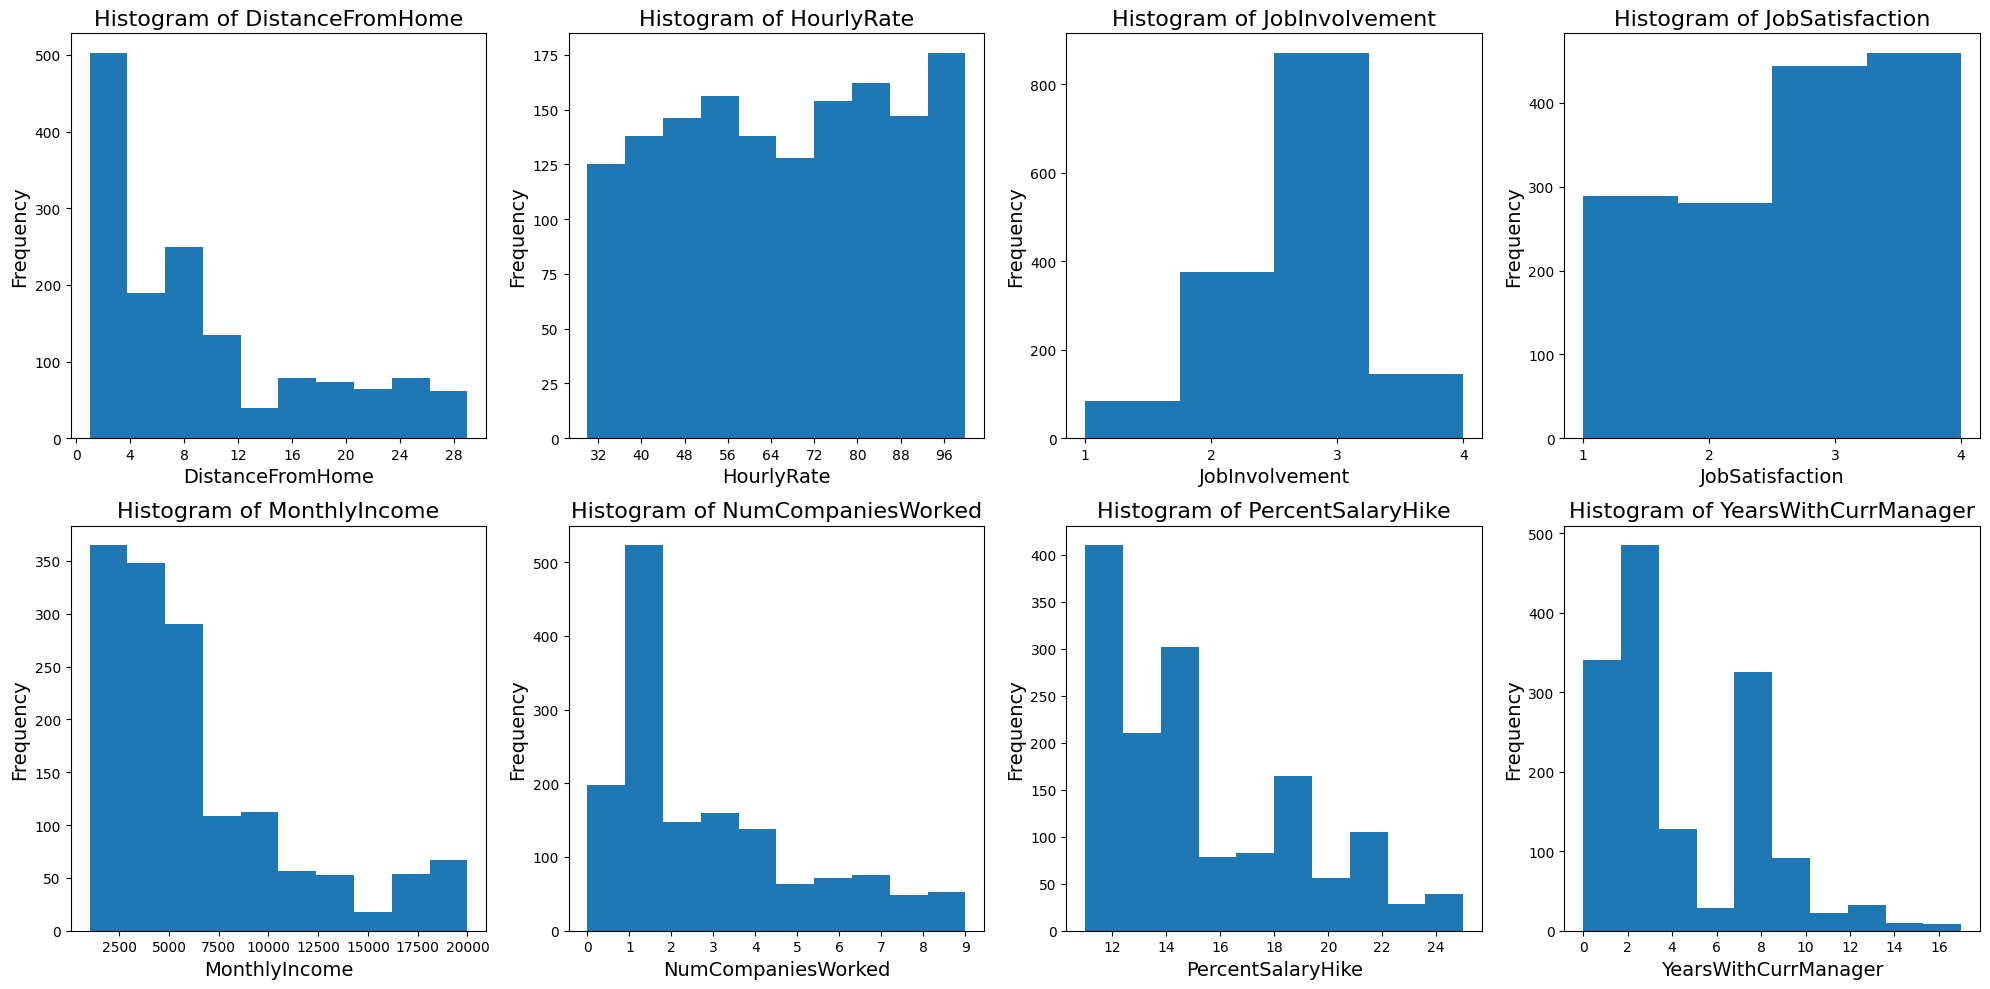

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, col in enumerate(num_with_missing.columns):
    ax = axs[i//4, i%4]
    if col in ['JobInvolvement', 'JobSatisfaction']:
        bins = 4
    else:
        bins = None
    num_with_missing[col].hist(ax=ax, bins=bins)
    ax.set_title(f'Histogram of {col}', fontsize = 16)
    ax.set_xlabel(col, fontsize =14)
    ax.set_ylabel('Frequency', fontsize =14)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.grid(False)

plt.tight_layout()
plt.savefig(f"figs/Histogram cols with missing value.pdf")
plt.show()



> Đối với các biến phân loại, và biến rời rạc, điền giá trị yếu vị vì đây là phương pháp
15
phổ biến. Với các biến định lượng còn lại, vì phân phối của chúng không đối xứng nên
điền median thay vì mean, do trung vị phù hợp hơn trong trường hợp này và nó ít bị ảnh
hưởng bởi outliers hơn.



In [ ]:
#Biến phân loại điền mode
for col in cat_with_missing.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
#Biến định lượng điền median (không có phân phối chuẩn, dùng median thay mean)
exclude_cols = ['JobInvolvement', 'JobSatisfaction']

for col in num_with_missing.columns:
    if col not in exclude_cols:
        df[col].fillna(math.ceil(df[col].median()), inplace=True)

#JobInvolvement, JobSatisfaction điền mode
for col in exclude_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

##Duplicates

In [ ]:
#Số dòng bị trùng
df.duplicated().sum()

7

In [ ]:
#Xóa các dòng bị trùng lắp
df = df.drop_duplicates()

##Outliers


In [ ]:
num = df.select_dtypes(exclude='O')
cat = df.select_dtypes(include='O')
num = num.astype({col: 'int64' for col in df.select_dtypes('Int64').columns}) #Chuyển về kiểu int64 để đưa về dạng số

In [ ]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1477 non-null   int64  
 1   DailyRate                 1477 non-null   int64  
 2   DistanceFromHome          1471 non-null   float64
 3   Education                 1477 non-null   int64  
 4   EnvironmentSatisfaction   1477 non-null   int64  
 5   HourlyRate                1470 non-null   float64
 6   JobInvolvement            1476 non-null   float64
 7   JobLevel                  1477 non-null   int64  
 8   JobSatisfaction           1474 non-null   float64
 9   MonthlyIncome             1473 non-null   float64
 10  NumCompaniesWorked        1476 non-null   float64
 11  PercentSalaryHike         1476 non-null   float64
 12  PerformanceRating         1477 non-null   int64  
 13  RelationshipSatisfaction  1477 non-null   int64  
 14  StockOpt

###Boxplot

Dùng phương pháp trực quan là xem boxplot của các biến định lượng, định tính để quan
sát outliers có thể có của từng biến. Tuy nhiên, nếu dữ liệu càng bị lệch thì càng có nhiều
quan sát bị nhận diện là outliers.


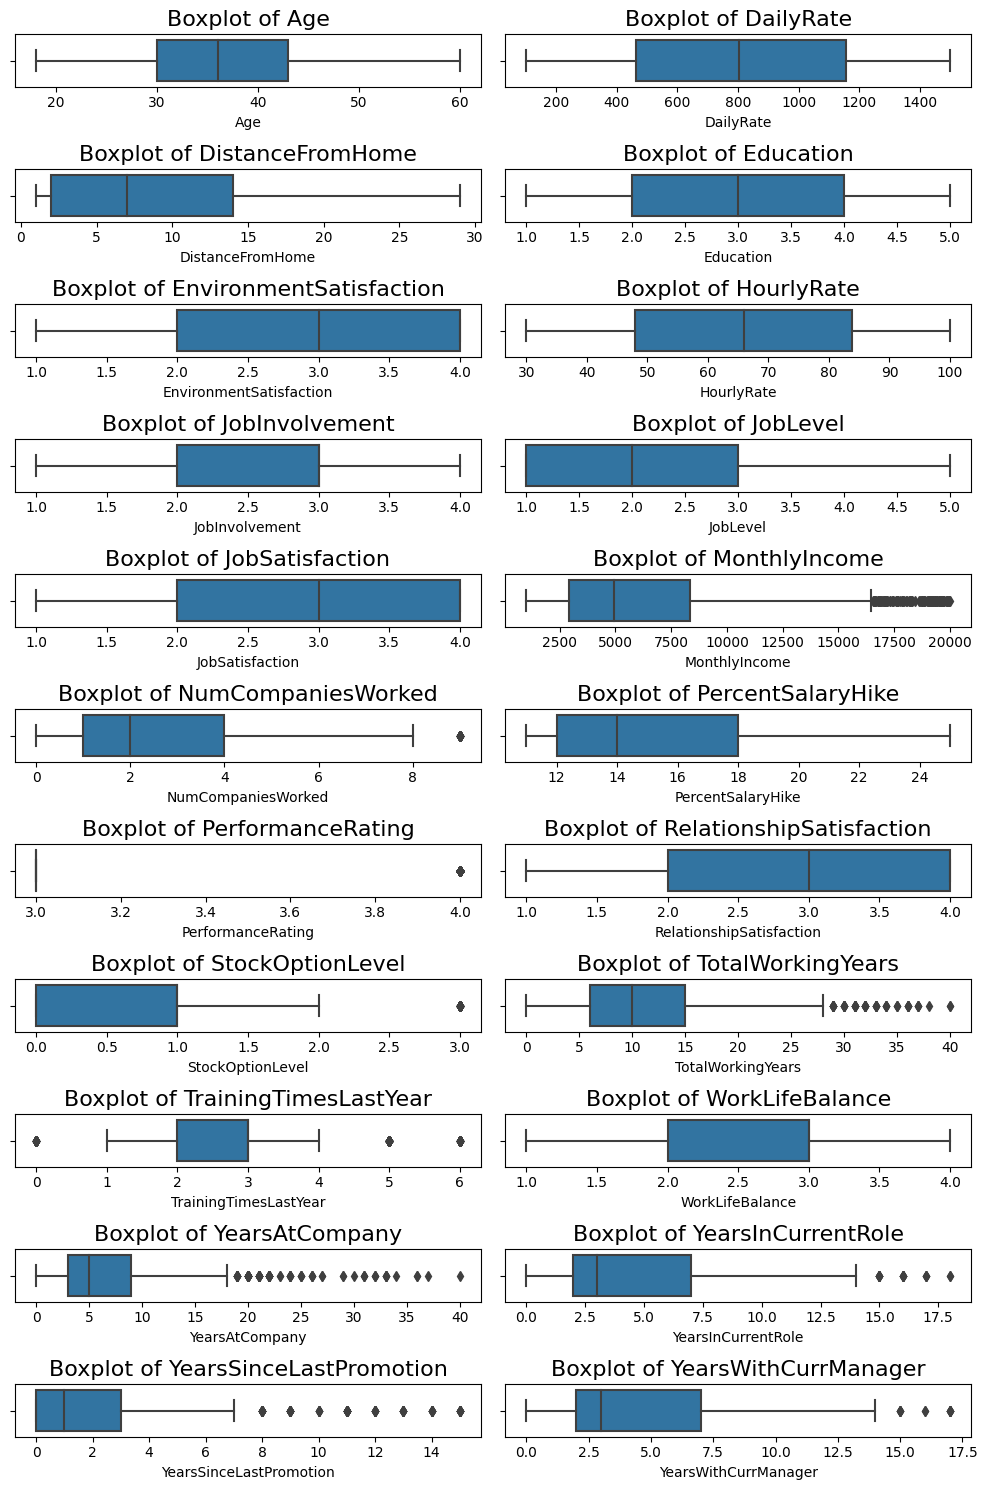

In [ ]:
fig, axs = plt.subplots(11, 2, figsize=(10, 15))
axs = axs.flatten()  # Flatten the axes array to iterate over it easily

for i, column in enumerate(num.columns):
    sns.boxplot(x=df[column], ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}', fontsize=16)

plt.tight_layout()
plt.savefig(f"figs/Boxplot num cols.pdf")
plt.show()



> Từ kết quả quan sát các boxplots, xác định được những biến xuất hiện outliers gồm:
’MonthlyIncome’, ’NumCompaniesWorked’, ’PerformanceRating’, ’StockOptionLevel’,
’TotalWorkingYears’, ’TrainingTimesLastYear’, ’YearsAtCompany’, ’YearsInCurrentRole’,
’YearsSinceLastPromotion’, ’YearsWithCurrManager’



###Xem phân phối của các biến có outliers

In [ ]:
cols_w_outliers = ['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating',
                   'StockOptionLevel', 'TotalWorkingYears',
                   'TrainingTimesLastYear', 'YearsAtCompany',
                   'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

float_cols = df[cols_w_outliers].select_dtypes(include=['float'])
int_cols = df[cols_w_outliers].select_dtypes(include=['integer'])


print(f'Biến liên tục: {float_cols.columns}')
print(f'Biến rời rạc: {int_cols.columns} {int_cols.columns.shape[0]}')


Biến liên tục: Index(['MonthlyIncome'], dtype='object')
Biến rời rạc: Index(['NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object') 9


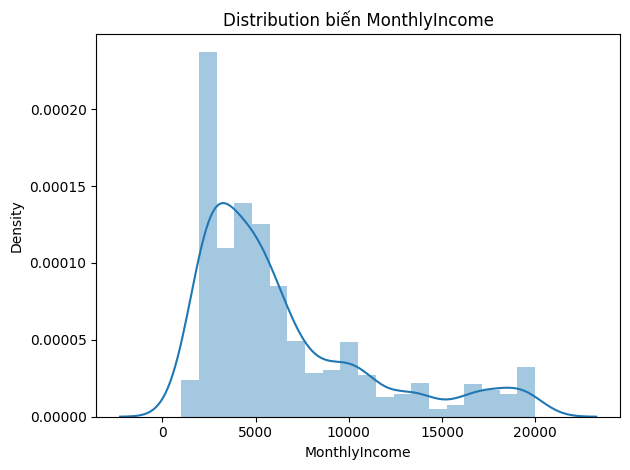

In [ ]:
#Phân phối biến liên tục
for col in float_cols.columns:
  plt.title(f'Distribution biến {col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Density')
  sbn.distplot(float_cols[col], kde = True, norm_hist = True)
  plt.tight_layout()
  plt.savefig(f"figs/Distribution biến {col}.pdf")
  plt.show()

In [ ]:
int_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1476
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   NumCompaniesWorked       1470 non-null   Int64
 1   PerformanceRating        1470 non-null   int64
 2   StockOptionLevel         1470 non-null   int64
 3   TotalWorkingYears        1470 non-null   int64
 4   TrainingTimesLastYear    1470 non-null   int64
 5   YearsAtCompany           1470 non-null   int64
 6   YearsInCurrentRole       1470 non-null   int64
 7   YearsSinceLastPromotion  1470 non-null   int64
 8   YearsWithCurrManager     1470 non-null   Int64
dtypes: Int64(2), int64(7)
memory usage: 117.7 KB


In [ ]:
int_cols = int_cols.astype({col: 'int64' for col in int_cols.select_dtypes('Int64').columns})

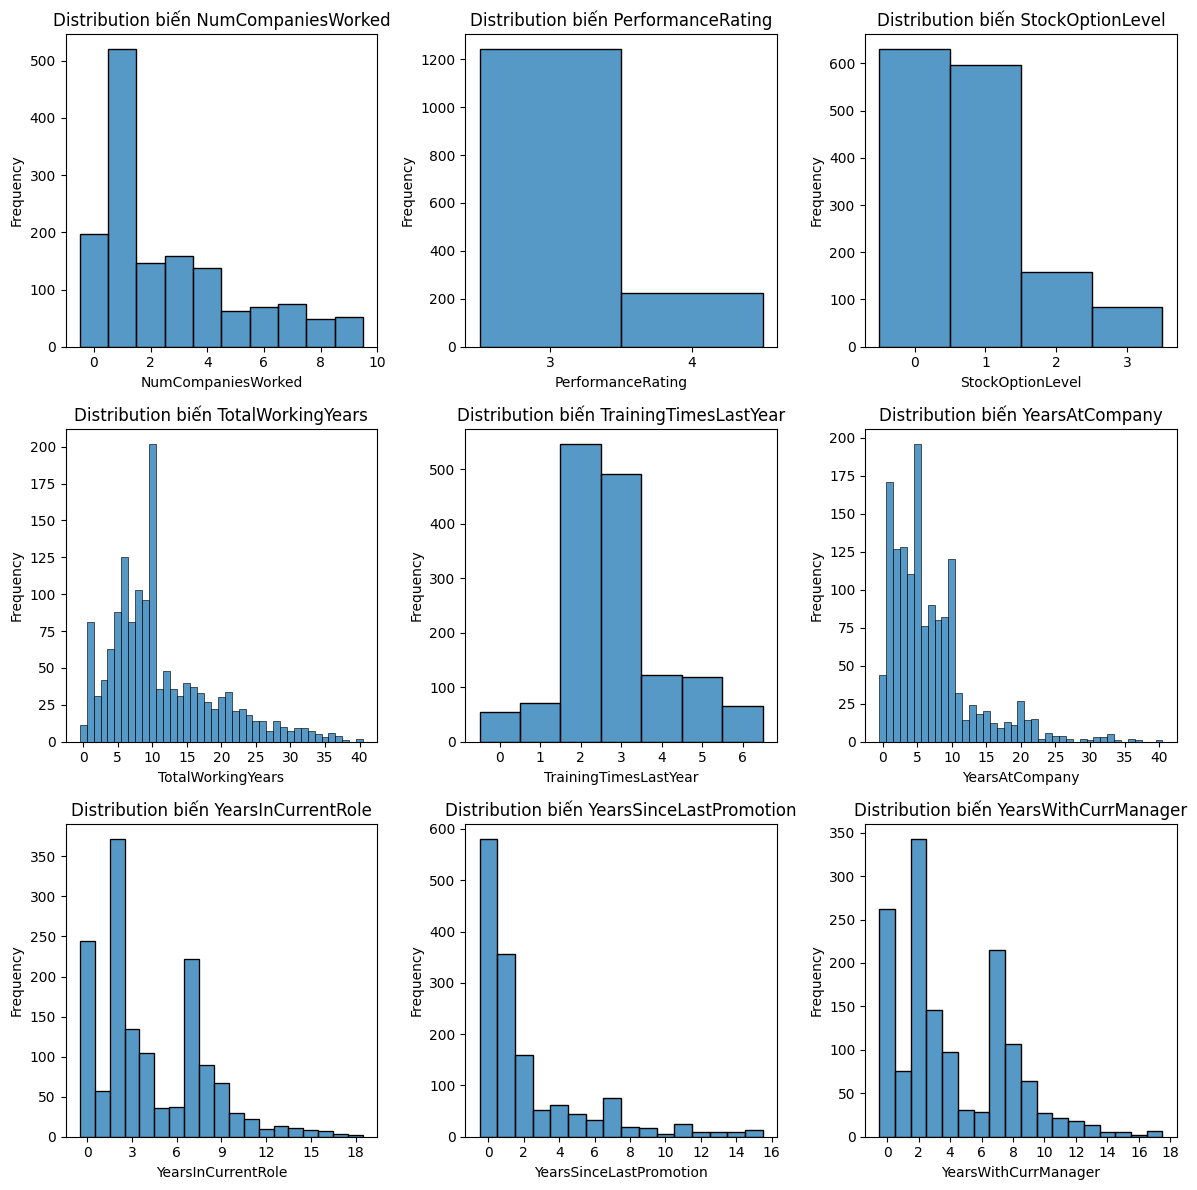

In [ ]:
#Phân phối biến rời rạc
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()

for i, col in enumerate(int_cols.columns):
    sbn.histplot(df, x=col, discrete=True, ax=axs[i])
    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[i].set_title(f'Distribution biến {col}')
    axs[i].set_xlabel(f'{col}')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig("figs/Distribution.pdf")
plt.show()


###IQR

Vì boxplot dựa trên phương pháp IQR nên tiếp tục dùng IQR để xem xét kỹ hơn các
outliers. Phương pháp này phù hợp với dữ liệu không tuân theo phân phối chuẩn và ít
nhạy cảm với các giá trị cực đoan.

In [ ]:
#IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 *IQR))]
    return outliers

for column in num.columns:
  outliers = detect_outliers_iqr(num[column])
  print(f"Outliers cột {column}: {np.sort(outliers.unique())}  Số lượng: {len(outliers)} ({(len(outliers)/ len(num[column]))* 100:.2f}%)")


Outliers cột Age: []  Số lượng: 0 (0.00%)
Outliers cột DailyRate: []  Số lượng: 0 (0.00%)
Outliers cột DistanceFromHome: []  Số lượng: 0 (0.00%)
Outliers cột Education: []  Số lượng: 0 (0.00%)
Outliers cột EnvironmentSatisfaction: []  Số lượng: 0 (0.00%)
Outliers cột HourlyRate: []  Số lượng: 0 (0.00%)
Outliers cột JobInvolvement: []  Số lượng: 0 (0.00%)
Outliers cột JobLevel: []  Số lượng: 0 (0.00%)
Outliers cột JobSatisfaction: []  Số lượng: 0 (0.00%)
Outliers cột MonthlyIncome: [16606. 16627. 16659. 16704. 16752. 16756. 16792. 16799. 16823. 16835.
 16856. 16872. 16880. 16885. 16959. 17007. 17046. 17048. 17068. 17099.
 17123. 17159. 17169. 17174. 17181. 17328. 17399. 17426. 17444. 17465.
 17567. 17584. 17603. 17639. 17650. 17665. 17779. 17856. 17861. 17875.
 17924. 18041. 18061. 18172. 18200. 18213. 18265. 18300. 18303. 18430.
 18606. 18665. 18711. 18722. 18740. 18789. 18824. 18844. 18880. 18947.
 19033. 19038. 19045. 19049. 19068. 19081. 19094. 19141. 19144. 19161.
 19187. 19189. 19

###Xử lý outliers (Quantile based capping)
Dùng phương pháp Quantile based capping, xử lý outliers bằng cách thay thế các giá trị ngoại lệ bằng các giá trị tại một phân vị cố định. Tất cả các giá trị lớn hơn phân vị 95% có thể được thay thế bằng giá trị của phân vị 95%, và tất cả các giá trị nhỏ hơn phân vị 5% có thể được thay thế bằng giá trị của phân vị 5%.

In [ ]:
outlier_col = ['MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear',
               'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
               'YearsWithCurrManager']

#Outlier capping
for column in outlier_col:
    lower_bound = df[column].quantile(0.05)
    upper_bound = df[column].quantile(0.95)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

####Xem lại dữ liệu sau khi xử lý

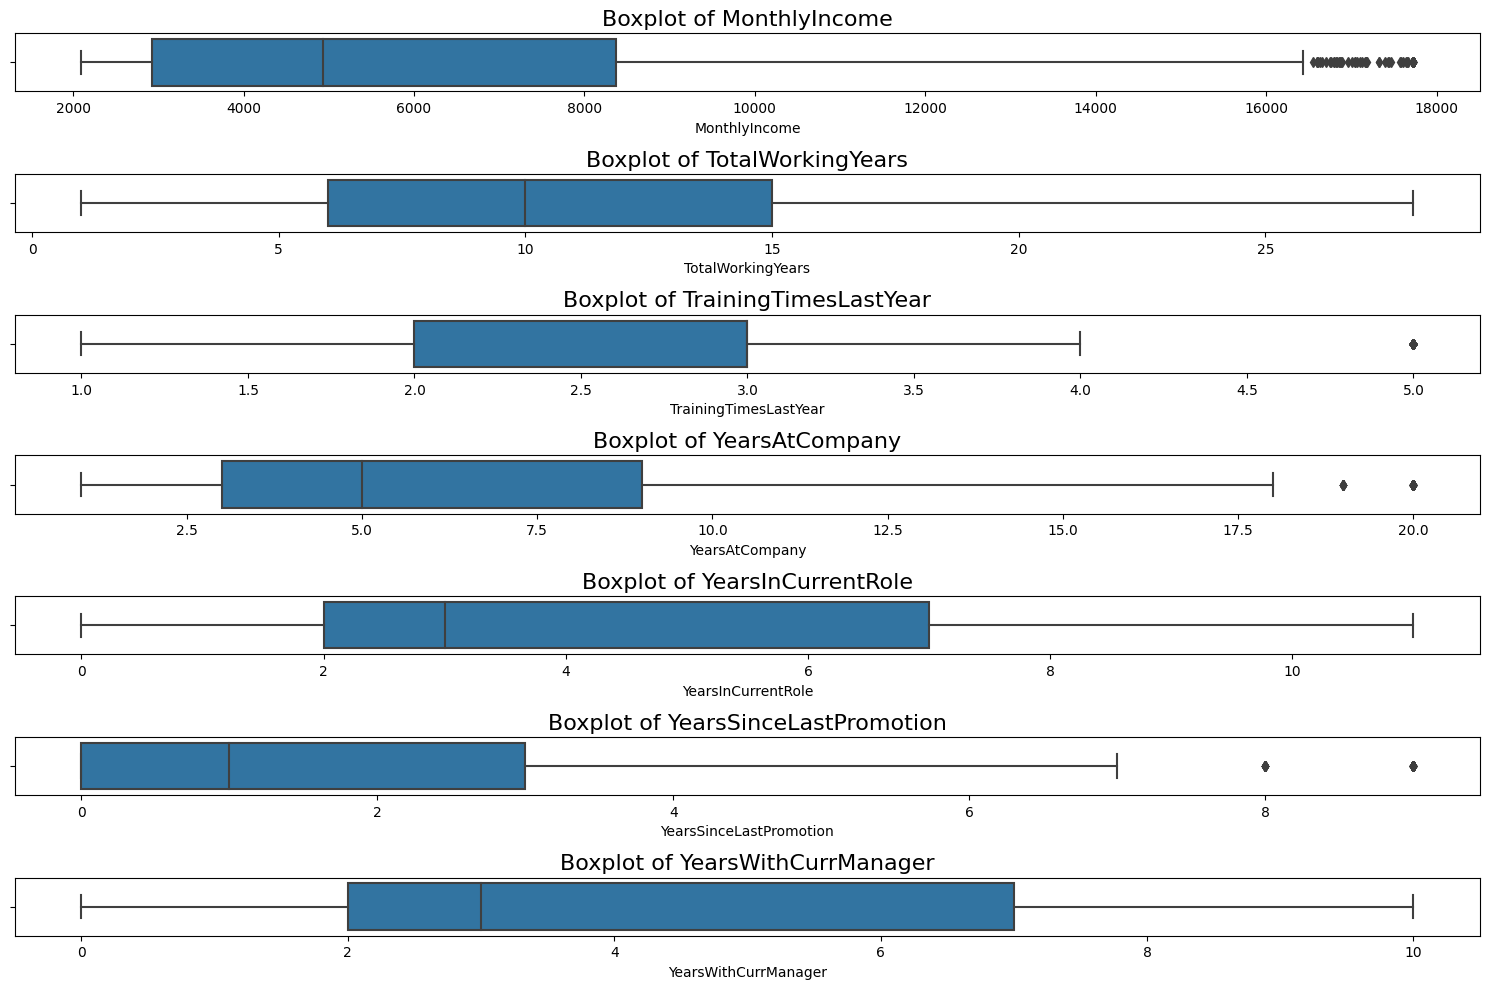

In [ ]:
fig, axs = plt.subplots(len(outlier_col), figsize=(15, 10))
for i, column in enumerate(outlier_col):
    sbn.boxplot(x=df[column], ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}', fontsize = 16)

plt.tight_layout()
plt.savefig(f"figs/Boxplot after handling outliers.pdf")
plt.show()

Chấp nhận giữ lại 1 tỷ lệ outliers nhất định để dữ liệu không quá khác biệt với thực tế.

In [ ]:
#Lưu dữ liệu
# df.to_csv('hr_data.csv')
df.to_csv('data_iqr.csv')

#2. Phân tích đơn biến

Việc phân tích đơn biến giúp xây dựng nền tảng cho những phân tích đa biến và mô hình
học máy ở các chương sau. Bằng cách hiểu rõ các đặc điểm cơ bản của các biến, ta có
khả năng đưa ra giả định và lập kế hoạch cho việc phân tích chi tiết hơn về mối liên quan
20
giữa các biến, đồng thời giúp xây dựng các mô hình dự đoán một cách hiệu quả.


In [ ]:
!gdown 1prPMgqX6TC31LNA-cz4-a1YOm2sHJzwj

Downloading...
From: https://drive.google.com/uc?id=1prPMgqX6TC31LNA-cz4-a1YOm2sHJzwj
To: /content/data_iqr.csv
100% 220k/220k [00:00<00:00, 82.1MB/s]


In [ ]:
df = pd.read_csv('/content/data_iqr.csv')

In [ ]:
# df = pd.read_csv('hr_data.csv')

## Định lượng

In [ ]:
df.select_dtypes(exclude = 'O').columns

Index(['Unnamed: 0', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Ratio - scale

In [ ]:
ratio_col = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate', 'MonthlyIncome',
             'NumCompaniesWorked','PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']

####Các đại lượng thống kê mô tả



In [ ]:
for col in ratio_col:
  mean = np.mean(df[col]).round(3)
  mode = list(df[col].mode().round(3))
  median = np.median(df[col]).round(3)
  data_range = np.ptp(df[col])
  variance = np.var(df[col], ddof=1).round(3)
  std_deviation = np.std(df[col], ddof=1).round(3)
  skewness = skew(df[col]).round(2)
  kurt = kurtosis(df[col]).round(2)
  print(f'Các đại lượng về xu thế trung tâm của biến {col}')
  print(f'Mean: {mean}')
  print(f'Mode: {mode}')
  print(f'Median: {median}')
  print('')
  print(f'Các đại lượng về độ phân tán biến {col}')
  print(f'Khoảng biến thiên (Range): {data_range}')
  print(f'Phương sai (Variance): {variance}')
  print(f'Độ lệch chuẩn (Standard deviation): {std_deviation}')
  print('')
  print(f'Các đại lượng về hình dáng phân phối biến {col}')
  print(f'Độ lệch: {skewness}')
  print(f'Độ nhọn: {kurt}')
  print('-'*50)

Các đại lượng về xu thế trung tâm của biến Age
Mean: 36.924
Mode: [35]
Median: 36.0

Các đại lượng về độ phân tán biến Age
Khoảng biến thiên (Range): 42
Phương sai (Variance): 83.455
Độ lệch chuẩn (Standard deviation): 9.135

Các đại lượng về hình dáng phân phối biến Age
Độ lệch: 0.41
Độ nhọn: -0.41
--------------------------------------------------
Các đại lượng về xu thế trung tâm của biến DailyRate
Mean: 802.486
Mode: [691]
Median: 802.0

Các đại lượng về độ phân tán biến DailyRate
Khoảng biến thiên (Range): 1397
Phương sai (Variance): 162819.594
Độ lệch chuẩn (Standard deviation): 403.509

Các đại lượng về hình dáng phân phối biến DailyRate
Độ lệch: -0.0
Độ nhọn: -1.2
--------------------------------------------------
Các đại lượng về xu thế trung tâm của biến DistanceFromHome
Mean: 9.192
Mode: [2.0]
Median: 7.0

Các đại lượng về độ phân tán biến DistanceFromHome
Khoảng biến thiên (Range): 28.0
Phương sai (Variance): 65.442
Độ lệch chuẩn (Standard deviation): 8.09

Các đại lượng về

####Biểu đồ phân phối

In [ ]:
float_cols = df[ratio_col].select_dtypes(include=['float'])
int_cols = df[ratio_col].select_dtypes(include=['integer'])

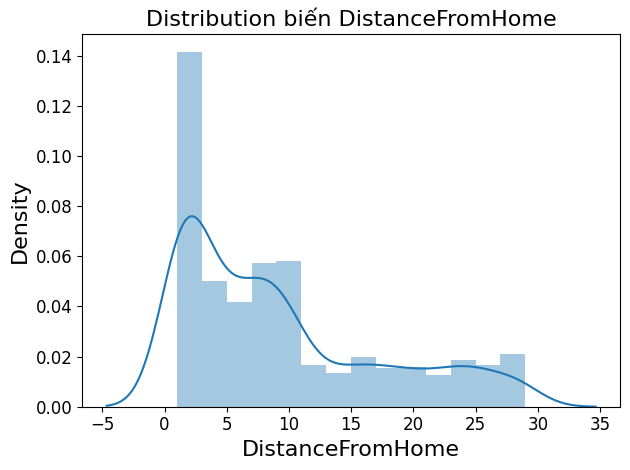

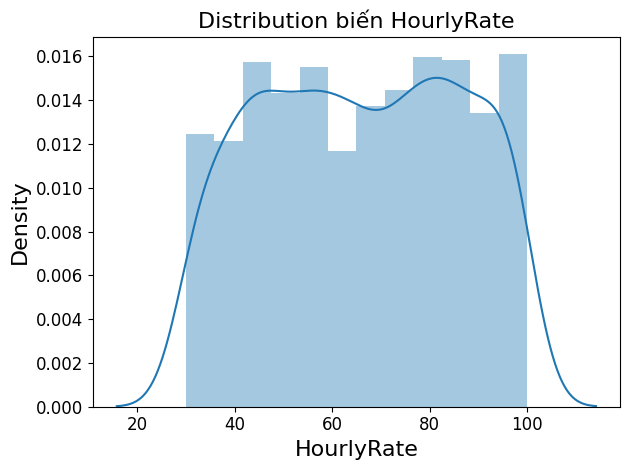

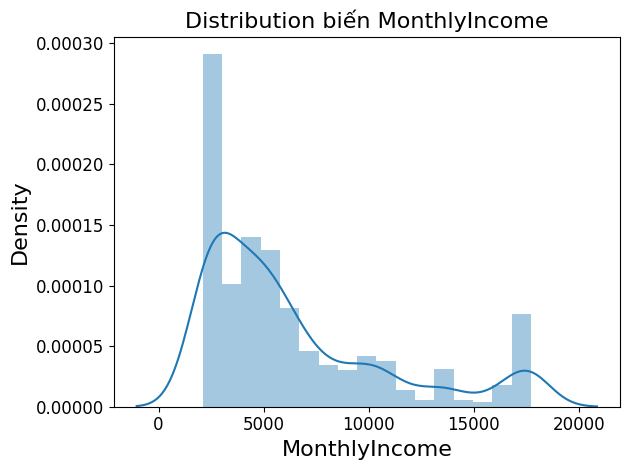

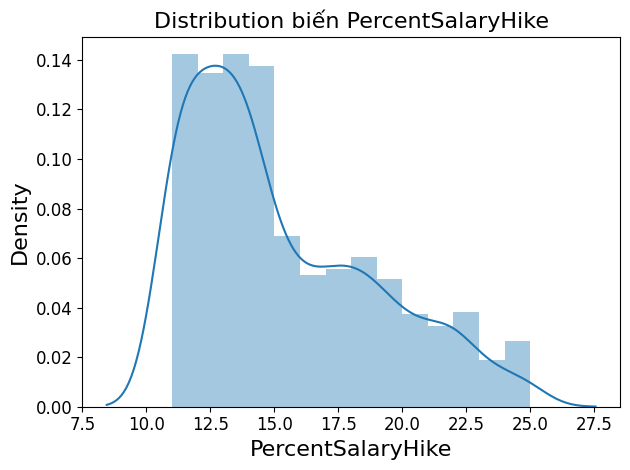

In [ ]:
#Distribution các biến liên tục
for col in float_cols.columns:
  plt.title(f'Distribution biến {col}',fontsize = 16)
  plt.xlabel(f'{col}',fontsize = 16)
  plt.ylabel('Density',fontsize = 16)
  sbn.distplot(float_cols[col], kde = True, norm_hist = True)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.tight_layout()
  plt.savefig(f"figs/Distribution biến {col}.pdf")
  plt.show()

In [ ]:
for col in int_cols.columns:
  print(f'Số giá trị unique của biến {col}: {len(df[col].unique())}')

Số giá trị unique của biến Age: 43
Số giá trị unique của biến DailyRate: 886
Số giá trị unique của biến NumCompaniesWorked: 10
Số giá trị unique của biến TotalWorkingYears: 28
Số giá trị unique của biến TrainingTimesLastYear: 5
Số giá trị unique của biến YearsAtCompany: 20
Số giá trị unique của biến YearsInCurrentRole: 12
Số giá trị unique của biến YearsSinceLastPromotion: 10
Số giá trị unique của biến YearsWithCurrManager: 11


<Figure size 400x400 with 0 Axes>

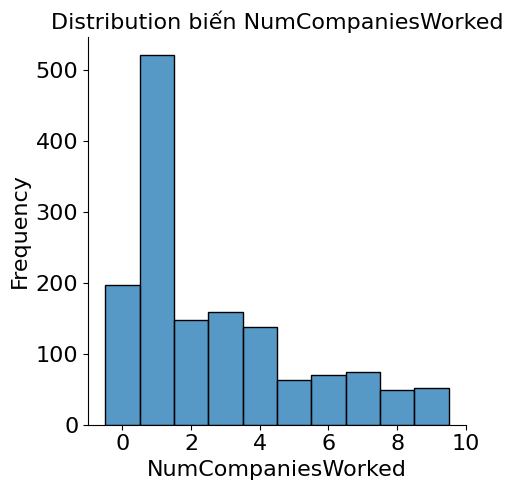

<Figure size 400x400 with 0 Axes>

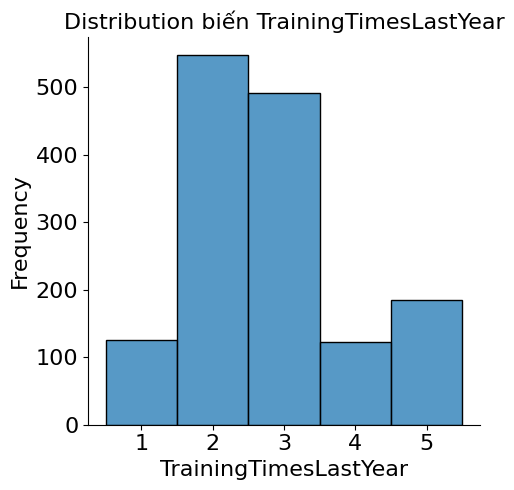

<Figure size 400x400 with 0 Axes>

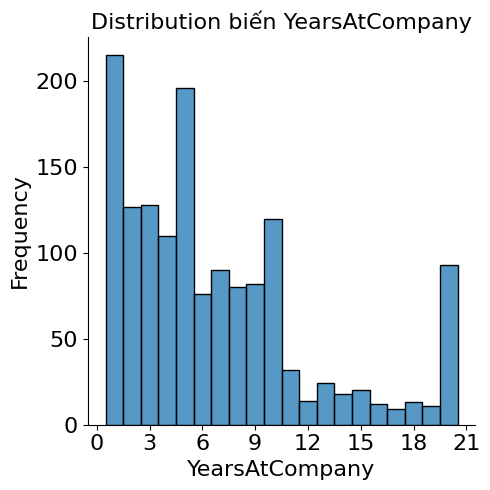

<Figure size 400x400 with 0 Axes>

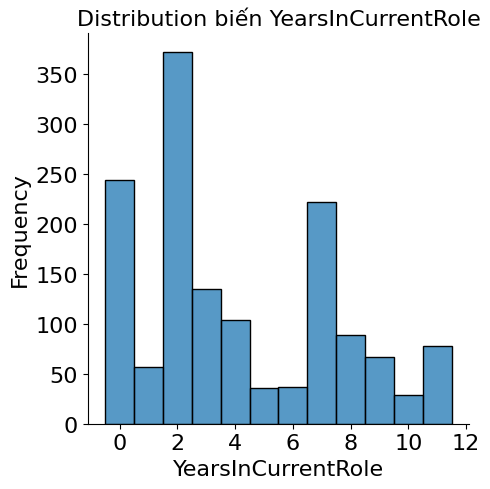

<Figure size 400x400 with 0 Axes>

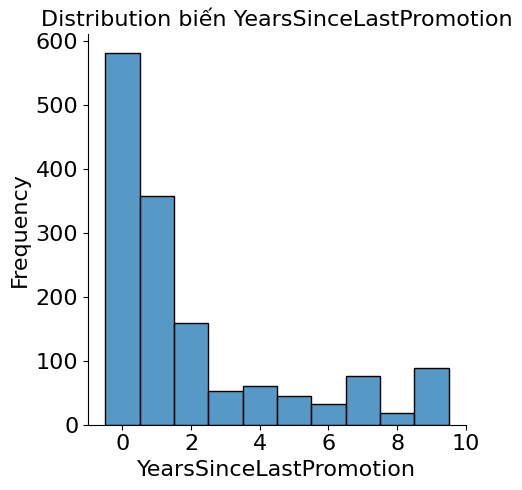

<Figure size 400x400 with 0 Axes>

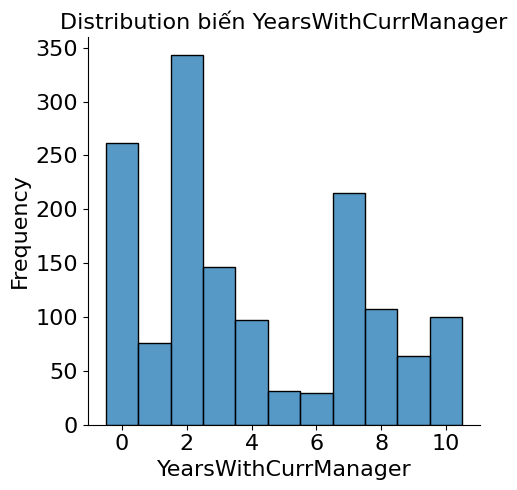

In [ ]:
#Distribution các biến rời rạc ít giá trị
for col in int_cols.columns:
  if len(df[col].unique()) <= 25:
    plt.figure(figsize = (4,4))
    sbn.displot(df, x=col, discrete=True)
    #Chuyển về số nguyên
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f'Distribution biến {col}',fontsize = 16)
    plt.xlabel(f'{col}',fontsize = 16)
    plt.ylabel('Frequency',fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.tight_layout()
    plt.savefig(f"figs/Distribution biến {col}.pdf")
    plt.show()

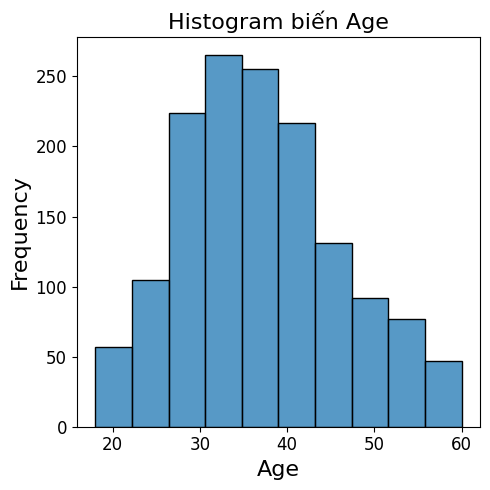

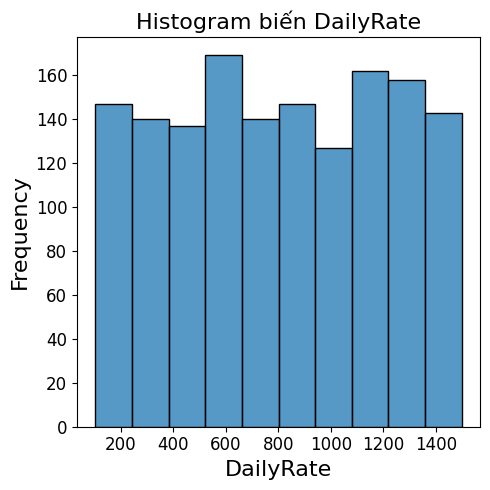

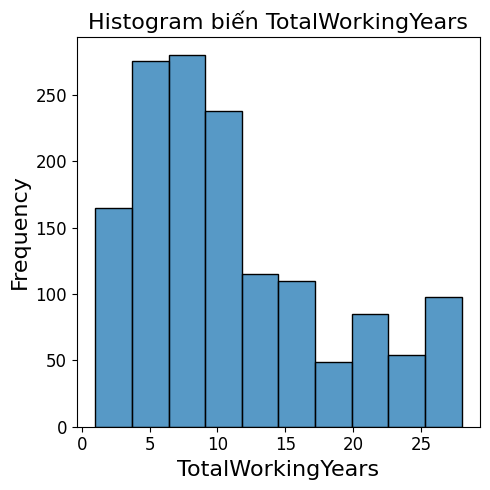

In [ ]:
#Distribution các biến rời rạc nhiều giá trị
for col in int_cols.columns:
  if len(df[col].unique()) > 25:
    plt.figure(figsize = (5,5))
    sns.histplot(df[col], bins=10)
    plt.title(f'Histogram biến {col}',fontsize=16)
    plt.xlabel(f'{col}',fontsize=16)
    plt.ylabel('Frequency',fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(f'figs/Phân phối {col}.pdf')
    plt.show()

### Interval-scale

In [ ]:
interval_col = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

####Các đại lượng thống kê mô tả

In [ ]:
for col in interval_col:
  mean = np.mean(df[col]).round(3)
  mode = list(df[col].mode().round(3))
  median = np.median(df[col]).round(3)
  variance = np.var(df[col], ddof=1).round(3)
  std_deviation = np.std(df[col], ddof=1).round(3)
  skewness = skew(df[col]).round(2)
  kurt = kurtosis(df[col]).round(2)
  print(f'Các đại lượng về xu thế trung tâm của biến {col}')
  print(f'Mean: {mean}')
  print(f'Mode: {mode}')
  print(f'Median: {median}')
  print('')
  print(f'Các đại lượng về độ phân tán biến {col}')
  print(f'Phương sai (Variance): {variance}')
  print(f'Độ lệch chuẩn (Standard deviation): {std_deviation}')
  print('')
  print(f'Các đại lượng về hình dáng phân phối biến {col}')
  print(f'Độ lệch: {skewness}')
  print(f'Độ nhọn: {kurt}')
  print('-'*50)

Các đại lượng về xu thế trung tâm của biến EnvironmentSatisfaction
Mean: 2.722
Mode: [3]
Median: 3.0

Các đại lượng về độ phân tán biến EnvironmentSatisfaction
Phương sai (Variance): 1.195
Độ lệch chuẩn (Standard deviation): 1.093

Các đại lượng về hình dáng phân phối biến EnvironmentSatisfaction
Độ lệch: -0.32
Độ nhọn: -1.2
--------------------------------------------------
Các đại lượng về xu thế trung tâm của biến JobInvolvement
Mean: 2.73
Mode: [3]
Median: 3.0

Các đại lượng về độ phân tán biến JobInvolvement
Phương sai (Variance): 0.506
Độ lệch chuẩn (Standard deviation): 0.712

Các đại lượng về hình dáng phân phối biến JobInvolvement
Độ lệch: -0.5
Độ nhọn: 0.27
--------------------------------------------------
Các đại lượng về xu thế trung tâm của biến JobSatisfaction
Mean: 2.732
Mode: [4]
Median: 3.0

Các đại lượng về độ phân tán biến JobSatisfaction
Phương sai (Variance): 1.217
Độ lệch chuẩn (Standard deviation): 1.103

Các đại lượng về hình dáng phân phối biến JobSatisfaction

####Biểu đồ tần số

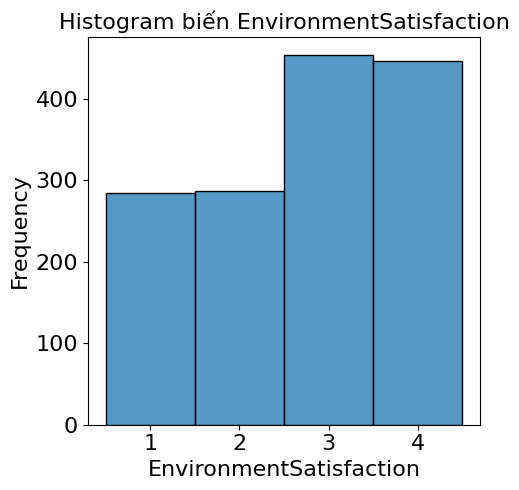

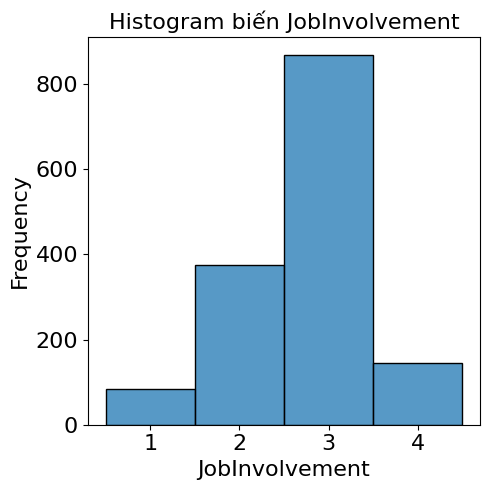

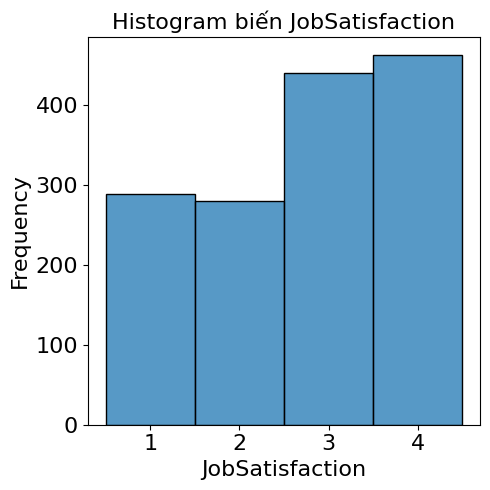

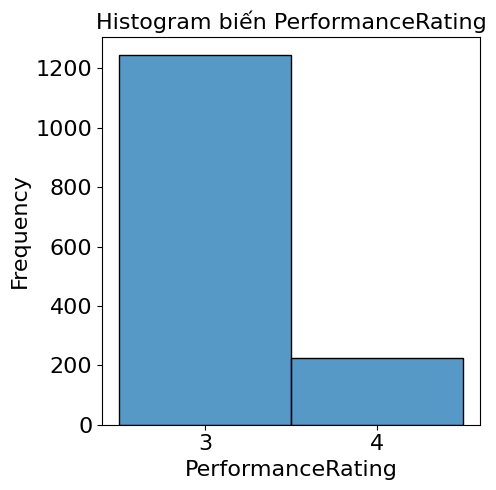

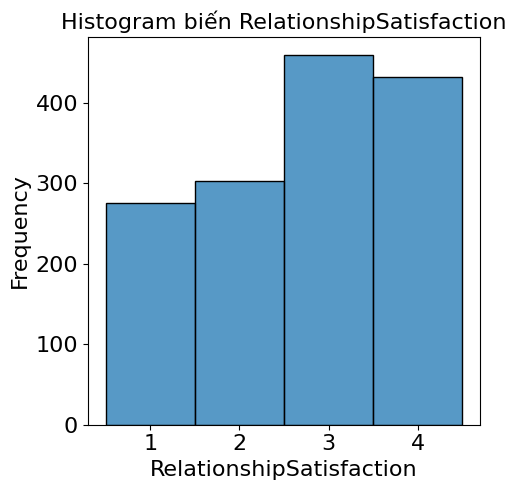

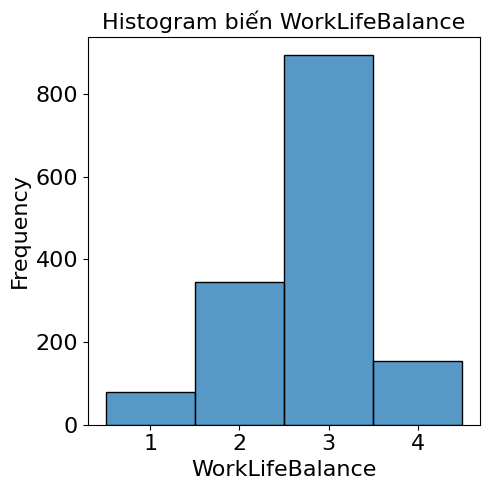

In [ ]:
from matplotlib.ticker import MaxNLocator
for col in interval_col:
  if len(df[col].unique()) <= 25:
    plt.figure(figsize =(5,5))
    sbn.histplot(df, x=col, discrete=True)
    #Chuyển về số nguyên
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f'Histogram biến {col}',fontsize = 16)
    plt.xlabel(f'{col}',fontsize = 16)
    plt.ylabel('Frequency',fontsize = 16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.savefig(f"figs/Histogram biến {col}.pdf")
    plt.show()

In [ ]:
df[interval_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EnvironmentSatisfaction   1470 non-null   int64
 1   JobInvolvement            1470 non-null   int64
 2   JobSatisfaction           1470 non-null   int64
 3   PerformanceRating         1470 non-null   int64
 4   RelationshipSatisfaction  1470 non-null   int64
 5   WorkLifeBalance           1470 non-null   int64
dtypes: int64(6)
memory usage: 69.0 KB


## Định tính

In [ ]:
ordinal_col = ['Education','JobLevel','StockOptionLevel']

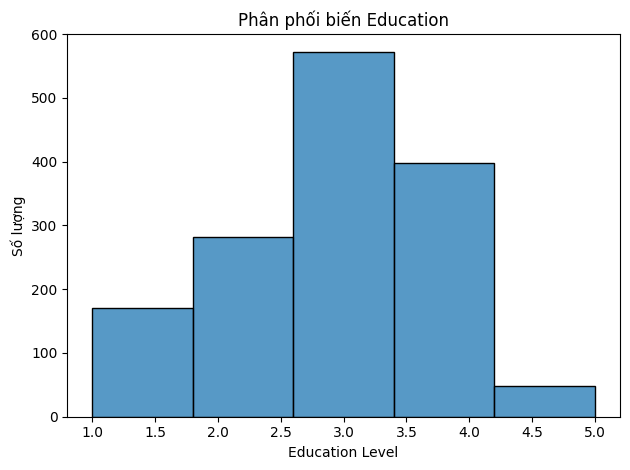

In [ ]:
sns.histplot(df['Education'], bins=5)
plt.title('Phân phối biến Education')
plt.xlabel('Education Level')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.savefig(f"figs/Histogram biến Education.pdf")
plt.show()

###Các đại lượng thống kê mô tả

In [ ]:
for col in ordinal_col:
  mode = list(df[col].mode())
  median = np.median(df[col]).round(3)
  quartiles = np.percentile(df[col], [25, 50, 75])

  print(f'Các đại lượng về xu thế trung tâm của biến {col}')
  print(f'Mode: {mode}')
  print(f'Median: {median}')
  print(f'Các đại lượng về độ phân tán biến {col}')
  print(f'Tứ phân vị (Quartiles): {quartiles}')
  print('-'*50)

Các đại lượng về xu thế trung tâm của biến Education
Mode: [3]
Median: 3.0
Các đại lượng về độ phân tán biến Education
Tứ phân vị (Quartiles): [2. 3. 4.]
--------------------------------------------------
Các đại lượng về xu thế trung tâm của biến JobLevel
Mode: [1]
Median: 2.0
Các đại lượng về độ phân tán biến JobLevel
Tứ phân vị (Quartiles): [1. 2. 3.]
--------------------------------------------------
Các đại lượng về xu thế trung tâm của biến StockOptionLevel
Mode: [0]
Median: 1.0
Các đại lượng về độ phân tán biến StockOptionLevel
Tứ phân vị (Quartiles): [0. 1. 1.]
--------------------------------------------------


###Biểu đồ tần số

<Figure size 400x400 with 0 Axes>

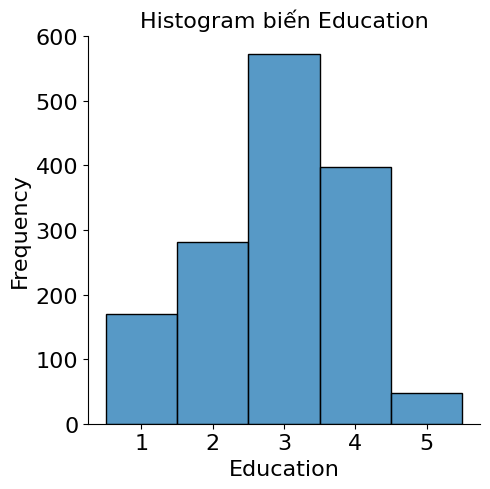

<Figure size 400x400 with 0 Axes>

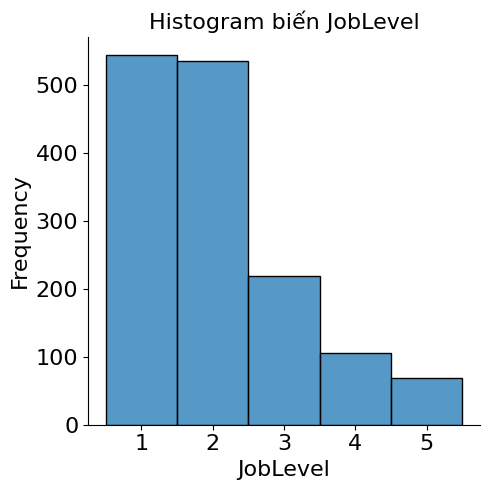

<Figure size 400x400 with 0 Axes>

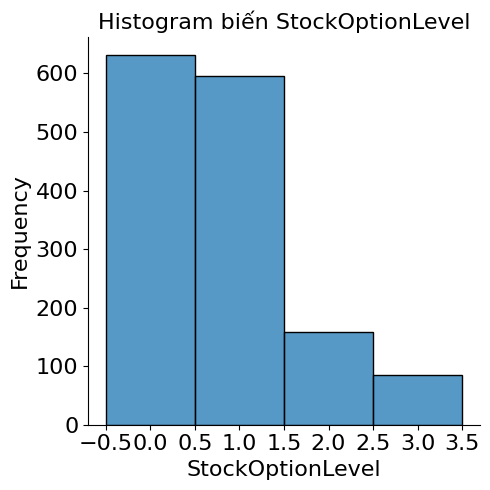

In [ ]:
for col in ordinal_col:
  if len(df[col].unique()) <= 25:
    plt.figure(figsize = (4,4))
    sbn.displot(df, x=col, discrete=True)
    plt.title(f'Histogram biến {col}',fontsize = 16)
    plt.xlabel(f'{col}',fontsize = 16)
    plt.ylabel('Frequency',fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.tight_layout()
    plt.savefig(f"figs/Histogram biến {col}.pdf")
    plt.show()

In [ ]:
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.191837,8.089606,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.901361,20.306211,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.731973,1.103370,1.0,2.00,3.0,4.00,4.0
MonthlyIncome,1470.0,6445.061497,4498.117198,2097.9,2926.75,4936.0,8368.50,17727.7


#3. Phân tích đa biến

## **Biểu diễn trực quan**

### Sự tương quan giữa thâm niên làm việc và thu nhập

In [ ]:
correlation = df['TotalWorkingYears'].corr(df['MonthlyIncome'], method='spearman').round(3)
print(f'Hệ số tương quan Spearman giữa biến TotalWorkingYears và biến MonthlyIncome: {correlation}')

Hệ số tương quan Spearman giữa biến TotalWorkingYears và biến MonthlyIncome: 0.707


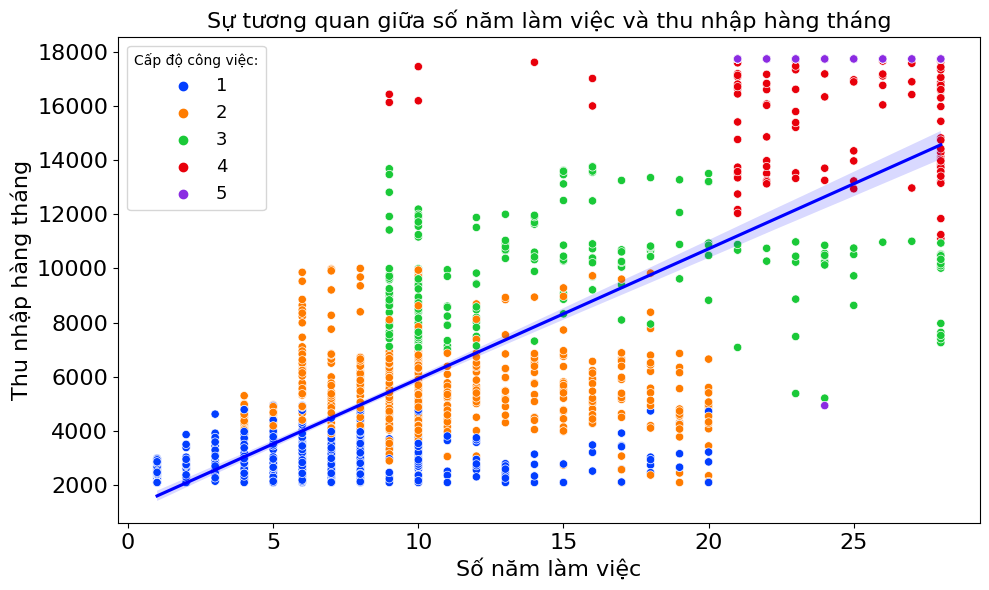

In [ ]:
plt.figure(figsize=(10, 6))
sbn.scatterplot(x=df['TotalWorkingYears'], y=df['MonthlyIncome'], hue=df['JobLevel'],palette='bright')
sbn.regplot(x=df['TotalWorkingYears'], y=df['MonthlyIncome'], scatter=False, color='blue')
plt.title('Sự tương quan giữa số năm làm việc và thu nhập hàng tháng', fontsize = 16)
plt.xlabel('Số năm làm việc', fontsize = 16)
plt.ylabel('Thu nhập hàng tháng', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(f"figs/Sự tương quan giữa số năm làm việc và thu nhập hàng tháng.pdf")
plt.legend(title='Cấp độ công việc:', fontsize = 13)
plt.show()

Đối với các nhân viên đã làm việc từ dưới 5 năm, đa phần họ đều ở cấp độ 1 hoặc 2, thu
nhập hàng tháng của họ dao động ở mức thấp nhất, trung bình xấp xỉ 3,000 dollars. Các
nhân viên đạt cấp độ 2 có mức thu nhập cao hơn một chút so với nhân viên cấp độ 1 và
chỉ có một nhân viên cấp độ 1 có mức thu nhập cao vượt trội so với các nhân viên cấp
độ 1 làm việc dưới 5 năm khác.

In [ ]:
df[df['TotalWorkingYears'] <= 5]['MonthlyIncome'].describe()

count     316.000000
mean     3017.141772
std       902.445731
min      2097.900000
25%      2304.250000
50%      2694.500000
75%      3731.750000
max      5301.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
df[(df['TotalWorkingYears'] >= 6)&(df['TotalWorkingYears'] <= 20)]['MonthlyIncome'].describe()

count      947.000000
mean      5713.478141
std       2874.489428
min       2097.900000
25%       3452.000000
50%       5231.000000
75%       6880.000000
max      17603.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
df[df['TotalWorkingYears'] > 20]['MonthlyIncome'].describe()

count      207.00000
mean     15024.92657
std       3261.39244
min       4936.00000
25%      13218.50000
50%      16752.00000
75%      17727.70000
max      17727.70000
Name: MonthlyIncome, dtype: float64

In [ ]:
# Lọc ra nhân viên làm việc trên 20 năm, đạt cấp độ 5 nhưng có mức thu nhập hàng tháng thấp
inc = df[(df['TotalWorkingYears'] > 20)&(df['JobLevel']==5)]['MonthlyIncome'].min()
df[(df['TotalWorkingYears'] > 20)&(df['JobLevel']==5)&(df['MonthlyIncome']==inc)][['Attrition','YearsAtCompany']]

,Attrition,YearsAtCompany
568,Yes,5


### Line graph mối quan hệ giữa YearsInCurrentRole và MonthlyIncome

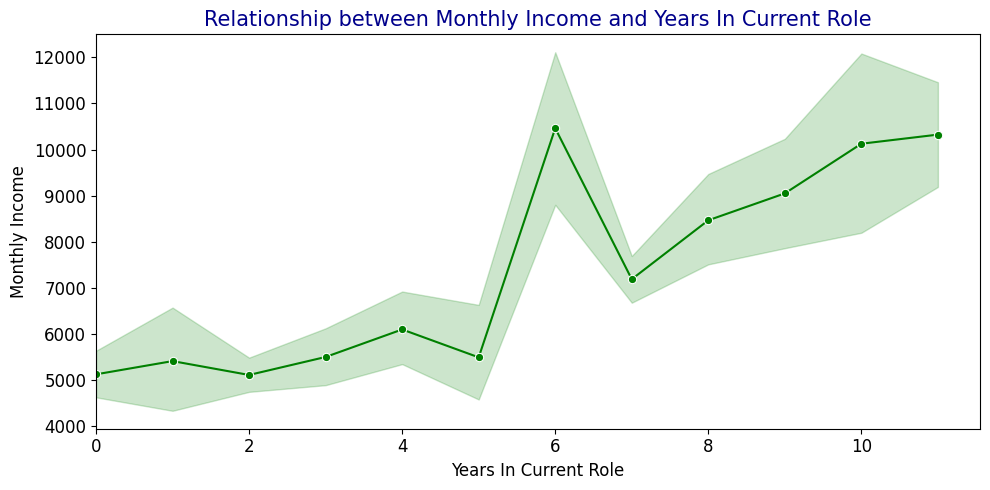

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df, x='YearsInCurrentRole', y='MonthlyIncome', marker='o', linestyle='-', color='green')
ax.set_xlim(left=0)

plt.xlabel('Years In Current Role',fontsize=12)
plt.ylabel('Monthly Income',fontsize=12)
plt.title('Relationship between Monthly Income and Years In Current Role',color='darkblue',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('figs/Relationship between Monthly Income and Years In Current Role.pdf')
plt.show()

Nhìn chung, có vẻ có một xu hướng tăng về mặt thu nhập hàng tháng trung bình khi số
năm ở vị trí hiện tại tăng lên. Điều này có thể liên quan đến việc nhân viên có cơ hội
được thăng cấp và nhận mức lương cao hơn khi họ ở lâu hơn ở một vị trí. Tuy nhiên, có
sự biến động đáng kể trong thu nhập hàng tháng ở một số năm cụ thể. Điều này có thể
đang phản ánh sự chênh lệch thu nhập hàng tháng giữa các vị trí công việc

### Stacked bar plot số lượng rời bỏ của nhân viên theo tình trạng hôn nhân

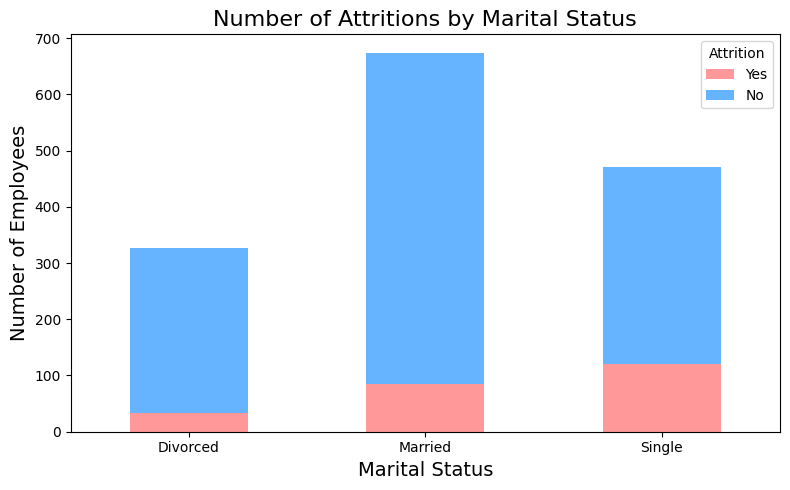

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


marital_status_counts = df.groupby(['MaritalStatus', 'Attrition']).size().unstack()
marital_status_inverted = marital_status_counts.loc[:, ::-1]
marital_status_inverted.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#ff9999','#66b3ff'])

plt.title('Number of Attritions by Marital Status', fontsize=16)
plt.xlabel('Marital Status',fontsize=14)
plt.ylabel('Number of Employees',fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.savefig(f'figs/Number of Attritions by Marital Status.pdf')
plt.show()


Mặc dù số lượng nhân viên còn độc thân ít hơn nhân viên đã kết hôn nhưng số lượng
người rời bỏ công việc lại cao hơn, có thể cho rằng nhóm độc thân có thể có xu hướng
rời đi nhiều hơn. Số lượng nhân viên đã kết hôn cao nhất và số nhân viên rời đi chiếm
phần nhỏ, những người kết hôn ít có khả năng rời đi hơn so với nhóm độc thân. Nhóm
nhân viên đã ly hôn có số lượng thấp nhất trong bảng và số lượng rời bỏ ở mức trung
bình.

## **Kiểm định**

### Gender vs Attrition

In [ ]:
contingency_table_gender = pd.crosstab(df['Gender'], df['Attrition'])
print('Bảng dữ liệu tần số:')
print()
print(contingency_table_gender)

alpha = 0.05
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)
print('\nH0: Giới tính và Sự rời đi của nhân viên không có mối quan hệ với nhau (độc lập nhau)')
print('H1: Giới tính và Sự rời đi của nhân viên có mối quan hệ với nhau (phụ thuộc nhau)')
print(f'\nAlpha: {alpha} (Mức độ tin cậy 95%)')
print(f'Chi-square value: {chi2:.4f}')
print(f'p-value: {p:.4f}')
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha:.4f} nên bác bỏ H0 ==> (Gender, Attrition) PHỤ THUỘC')
else:
    print(f'Trị số p = {p:.4f} >= {alpha:.4f} KHÔNG bác bỏ H0 ==> (Gender, Attrition) ĐỘC LẬP')

Bảng dữ liệu tần số:

Attrition   No  Yes
Gender             
Female     501   87
Male       732  150

H0: Giới tính và Sự rời đi của nhân viên không có mối quan hệ với nhau (độc lập nhau)
H1: Giới tính và Sự rời đi của nhân viên có mối quan hệ với nhau (phụ thuộc nhau)

Alpha: 0.05 (Mức độ tin cậy 95%)
Chi-square value: 1.1170
p-value: 0.2906
Trị số p = 0.2906 >= 0.0500 KHÔNG bác bỏ H0 ==> (Gender, Attrition) ĐỘC LẬP



### OverTime vs Attrition

In [ ]:
# Tạo bảng tần số chéo (contingency table) giữa OverTime và Attrition
contingency_table_OT = pd.crosstab(df['OverTime'], df['Attrition'])
print('Bảng dữ liệu tần số:')
print()
print(contingency_table_OT)

alpha = 0.05
chi2, p, _, _ = chi2_contingency(contingency_table_OT)
print('\nH0: Tăng ca và Sự rời đi của nhân viên không có mối quan hệ với nhau (độc lập nhau)')
print('H1: Tăng ca và Sự rời đi của nhân viên có mối quan hệ với nhau (phụ thuộc nhau)')
print(f'\nAlpha: {alpha} (Mức độ tin cậy 95%)')
print(f'Chi-square value: {chi2:.4f}')
print(f'p-value: {p}')
if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} nên bác bỏ H0 ==> (OverTime, Attrition) PHỤ THUỘC')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} KHÔNG bác bỏ H0 ==> (OverTime, Attrition) ĐỘC LẬP')

Bảng dữ liệu tần số:

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127

H0: Tăng ca và Sự rời đi của nhân viên không có mối quan hệ với nhau (độc lập nhau)
H1: Tăng ca và Sự rời đi của nhân viên có mối quan hệ với nhau (phụ thuộc nhau)

Alpha: 0.05 (Mức độ tin cậy 95%)
Chi-square value: 87.5643
p-value: 8.15842372153832e-21
Trị số p = 8.15842372153832e-21 < 0.0500 nên bác bỏ H0 ==> (OverTime, Attrition) PHỤ THUỘC


### Tương quan giữa biến MonthlyIncome và Attrition

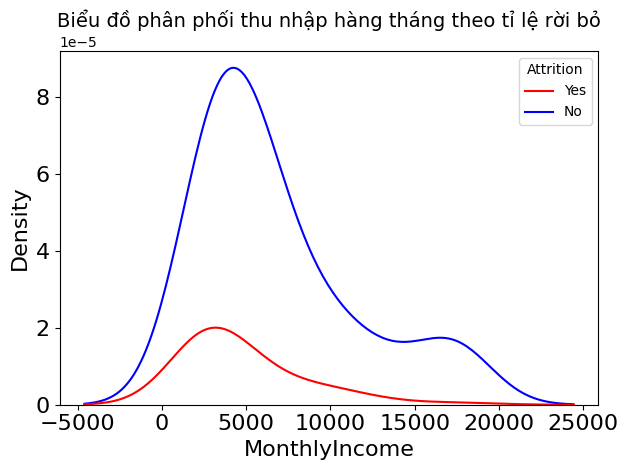

In [ ]:
sbn.kdeplot(df, x='MonthlyIncome', hue='Attrition', palette={'Yes': 'red', 'No': 'blue'},bw_adjust=2)
plt.title(f'Biểu đồ phân phối thu nhập hàng tháng theo tỉ lệ rời bỏ',fontsize=14)
plt.xlabel(f'MonthlyIncome',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(f"figs/Distribution biến MonthlyIncome theo Attrition.pdf")
plt.show()

> Giá trị p (p-value) là 1.2985087701945417e-14, một giá trị cực kỳ nhỏ, gần như bằng
không. Vì giá trị p rất nhỏ và thấp hơn nhiều so với mức alpha đã chọn, ta có đủ cơ sở để
bác bỏ giả thuyết không (H0), tức tiền lương hàng tháng của nhóm nhân viên rời đi nhỏ
hơn so với tiền lương hàng tháng của nhóm nhân viên ở lại.

Từ đó rút ra kết luận rằng mức thu nhập hàng tháng có thể là một yếu tố ảnh hưởng đến
quyết định của nhân viên khi cân nhắc việc rời bỏ công ty. Các nhà quản trị có thể xem
xét thông tin này khi xây dựng chiến lược giữ chân nhân viên hoặc cải thiện cấu trúc
lương bổng.



In [ ]:
income1 = df[df['Attrition'] == 'Yes']['MonthlyIncome']
income2 = df[df['Attrition'] == 'No']['MonthlyIncome']
print('H0: Thu nhập hàng tháng của nhóm nhân viên rời đi lớn hơn hoặc bằng thu nhập hàng tháng của nhóm nhân viên ở lại')
print('H1: Thu nhập hàng tháng của nhóm nhân viên rời đi nhỏ hơn thu nhập hàng tháng của nhóm nhân viên ở lại')
statistic, p = stats.mannwhitneyu(income1, income2,alternative='less')
alpha = 0.05
print(f'\nAlpha = {alpha} (Độ tin cậy 95%)')
print(f'Trị số p = {p}')
if p >= alpha:
  print("Vì p >= alpha nên không bác bỏ H0")
else:
  print("Vì p < alpha nên bác bỏ H0")

H0: Thu nhập hàng tháng của nhóm nhân viên rời đi lớn hơn hoặc bằng thu nhập hàng tháng của nhóm nhân viên ở lại
H1: Thu nhập hàng tháng của nhóm nhân viên rời đi nhỏ hơn thu nhập hàng tháng của nhóm nhân viên ở lại

Alpha = 0.05 (Độ tin cậy 95%)
Trị số p = 1.2985087701945417e-14
Vì p < alpha nên bác bỏ H0


### Tương quan giữa biến TotalWorkingYears và Attrition

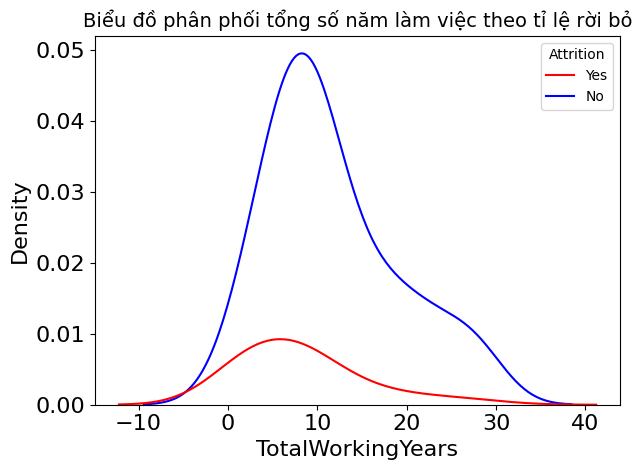

In [ ]:
sbn.kdeplot(df, x='TotalWorkingYears', hue='Attrition', palette={'Yes': 'red', 'No': 'blue'},bw_adjust=2)
plt.title(f'Biểu đồ phân phối tổng số năm làm việc theo tỉ lệ rời bỏ',fontsize=14)
plt.xlabel(f'TotalWorkingYears',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(f"figs/Distribution biến TotalWorkingYears theo Attrition.pdf")
plt.show()



> Giá trị p (p-value) là 1.057614921355609e-14, một giá trị cực kỳ nhỏ, gần như bằng
không. Vì giá trị p nhỏ hơn nhiều so với mức alpha đã chọn (0.05), ta có đủ bằng chứng
thống kê để bác bỏ giả thuyết không (H0), tức tổng số năm làm việc của nhóm nhân viên
rời đi thực sự nhỏ hơn tổng số năm làm việc của nhóm nhân viên ở lại.



Kết quả này có thể chỉ ra rằng kinh nghiệm làm việc (tính theo số năm làm việc) có thể
ảnh hưởng đến quyết định rời bỏ công ty của nhân viên. Các nhà quản lý và nhà hoạch
định chính sách có thể cân nhắc việc này khi thiết kế chương trình phát triển sự nghiệp
và cơ hội thăng tiến để giữ chân nhân viên có kinh nghiệm.

In [ ]:
total1 = df[df['Attrition'] == 'Yes']['TotalWorkingYears']
total2 = df[df['Attrition'] == 'No']['TotalWorkingYears']
print('H0: Tổng số năm làm việc của nhóm nhân viên rời đi lớn hơn hoặc tổng số năm làm việc của nhóm nhân viên ở lại')
print('H1: Tổng số năm làm việc của nhóm nhân viên rời đi nhỏ hơn tổng số năm làm việc của nhóm nhân viên ở lại')
statistic, p = stats.mannwhitneyu(total1, total2,alternative='less')
alpha = 0.05
print(f'\nAlpha = {alpha} (Độ tin cậy 95%)')
print(f'Trị số p = {p}')
if p >= alpha:
  print("Vì p >= alpha nên không bác bỏ H0")
else:
  print("Vì p < alpha nên bác bỏ H0")

H0: Tổng số năm làm việc của nhóm nhân viên rời đi lớn hơn hoặc tổng số năm làm việc của nhóm nhân viên ở lại
H1: Tổng số năm làm việc của nhóm nhân viên rời đi nhỏ hơn tổng số năm làm việc của nhóm nhân viên ở lại

Alpha = 0.05 (Độ tin cậy 95%)
Trị số p = 1.057614921355609e-14
Vì p < alpha nên bác bỏ H0


###Kiểm định sự khác biệt về thu nhập giữa các phòng ban

In [ ]:
## Kiểm định phương sai bằng nhau
import scipy.stats as stats


group1 = df[df['Department'] == 'Sales']['MonthlyIncome']
group2 = df[df['Department'] == 'Research & Development']['MonthlyIncome']
group3 = df[df['Department'] == 'Human Resources']['MonthlyIncome']


levene, p = stats.levene(group1, group2, group3)
print('H0: Các mẫu dữ liệu có phương sai bằng nhau')
print('H1: Các mẫu dữ liệu có phương sai khác nhau')
print(f'Trị thống kê Levene = {levene:4f}; p = {p:4f}')
if p > 0.05:
    print("Vì p > alpha nên không bác bỏ H0")
else:
    print("Vì p < alpha nên bác bỏ H0")


H0: Các mẫu dữ liệu có phương sai bằng nhau
H1: Các mẫu dữ liệu có phương sai khác nhau
Trị thống kê Levene = 3.398108; p = 0.033700
Vì p < alpha nên bác bỏ H0


In [ ]:
## Kiểm định phân phối chuẩn Shapiro dựa trên Ordinary Least Squares (OLS) model
print('H0: Dữ liệu các nhóm có phân phối chuẩn')
print('H1: Dữ liệu các nhóm không có phân phối chuẩn')
model           = ols('MonthlyIncome ~ C(Department)', data = df[['Department','MonthlyIncome']]).fit()
shapiro, p      = stats.shapiro(model.resid)
print(f'Trị thống kê Shapiro = {shapiro:4f}; p = {p}')
if p > 0.05:
    print("Vì p > alpha nên không bác bỏ H0")
else:
    print("Vì p < alpha nên bác bỏ H0")

H0: Dữ liệu các nhóm có phân phối chuẩn
H1: Dữ liệu các nhóm không có phân phối chuẩn
Trị thống kê Shapiro = 0.821791; p = 1.4318055166203084e-37
Vì p < alpha nên bác bỏ H0


In [ ]:
# Kiểm định Welch's ANOVA
print('H0: Mức thu nhập trung bình của 3 phòng ban bằng nhau')
print('H1: Có sự khác biệt về mức thu nhập trung bình giữa các phòng ban')
stat, p = stats.f_oneway(group1, group2, group3)
print(f'Trị số p = {p:4f}')
if p > 0.05:
  print("Vì p > alpha nên không bác bỏ H0")
else:
  print("Vì p < alpha nên bác bỏ H0")

H0: Mức thu nhập trung bình của 3 phòng ban bằng nhau
H1: Có sự khác biệt về mức thu nhập trung bình giữa các phòng ban
Trị số p = 0.018127
Vì p < alpha nên bác bỏ H0


In [ ]:
#Hậu kiểm Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['MonthlyIncome'],
                          groups=df['Department'],
                          alpha=0.05)
print(tukey)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
        group1                 group2          meandiff p-adj    lower      upper   reject
------------------------------------------------------------------------------------------
       Human Resources Research & Development -289.1974 0.8735 -1658.8215 1080.4267  False
       Human Resources                  Sales  439.7275  0.747  -977.7121 1857.1671  False
Research & Development                  Sales  728.9249 0.0129   125.5305 1332.3194   True
------------------------------------------------------------------------------------------


### Kiểm định sự khác biệt về mức tăng lương giữa các phòng ban



In [ ]:
## Kiểm định phương sai bằng nhau
import scipy.stats as stats


group1 = df[df['Department'] == 'Sales']['PercentSalaryHike']
group2 = df[df['Department'] == 'Research & Development']['PercentSalaryHike']
group3 = df[df['Department'] == 'Human Resources']['PercentSalaryHike']


levene, p = stats.levene(group1, group2, group3)
print('H0: Các mẫu dữ liệu có phương sai bằng nhau')
print('H1: Các mẫu dữ liệu có phương sai khác nhau')
print(f'Trị thống kê Levene = {levene:4f}; p = {p:4f}')
if p > 0.05:
    print("Vì p > alpha nên không bác bỏ H0")
else:
    print("Vì p < alpha nên bác bỏ H0")


H0: Các mẫu dữ liệu có phương sai bằng nhau
H1: Các mẫu dữ liệu có phương sai khác nhau
Trị thống kê Levene = 0.337159; p = 0.713850
Vì p > alpha nên không bác bỏ H0


In [ ]:
## Kiểm định phân phối chuẩn Shapiro dựa trên Ordinary Least Squares (OLS) model
print('H0: Dữ liệu các nhóm có phân phối chuẩn')
print('H1: Dữ liệu các nhóm không có phân phối chuẩn')
model           = ols('PercentSalaryHike ~ C(Department)', data = df[['Department','PercentSalaryHike']]).fit()
shapiro, p      = stats.shapiro(model.resid)
print(f'Trị thống kê Shapiro = {shapiro:4f}; p = {p}')
if p > 0.05:
    print("Vì p > alpha nên không bác bỏ H0")
else:
    print("Vì p < alpha nên bác bỏ H0")

H0: Dữ liệu các nhóm có phân phối chuẩn
H1: Dữ liệu các nhóm không có phân phối chuẩn
Trị thống kê Shapiro = 0.905488; p = 3.134589410704979e-29
Vì p < alpha nên bác bỏ H0


In [ ]:
# Kiểm định Welch's ANOVA
print('H0: Mức tăng lương trung bình của 3 phòng ban bằng nhau')
print('H1: Có sự khác biệt về mức tăng lương trung bình giữa các phòng ban')
stat, p = stats.f_oneway(group1, group2, group3)
print(f'Trị số p = {p:4f}')
if p > 0.05:
  print("Vì p > alpha nên không bác bỏ H0")
else:
  print("Vì p < alpha nên bác bỏ H0")

H0: Mức tăng lương trung bình của 3 phòng ban bằng nhau
H1: Có sự khác biệt về mức tăng lương trung bình giữa các phòng ban
Trị số p = 0.389468
Vì p > alpha nên không bác bỏ H0


###Kiểm định sự khác biệt về mức độ hài lòng với công việc giữa nhân viên ở lại và nhân viên rời đi

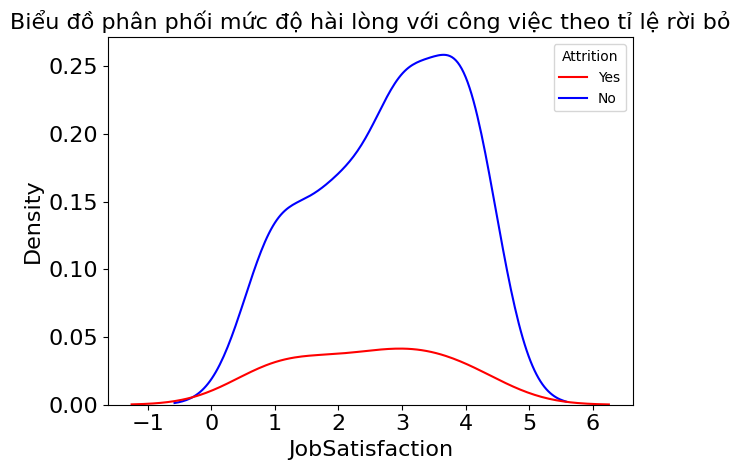

In [ ]:

sbn.kdeplot(df, x='JobSatisfaction', hue='Attrition', palette={'Yes': 'red', 'No': 'blue'},bw_adjust=2)

plt.title(f'Biểu đồ phân phối mức độ hài lòng với công việc theo tỉ lệ rời bỏ',fontsize=16)
plt.xlabel(f'JobSatisfaction',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(f"figs/Distribution biến JobSatisfaction theo Attrition.pdf")
plt.show()

In [ ]:
## Kiểm định Mann-Whitney U
group1 = df[df['Attrition'] == 'Yes']['JobSatisfaction']
group2 = df[df['Attrition'] == 'No']['JobSatisfaction']
print('''H0: Mức độ hài lòng với công việc của nhóm nhân viên rời đi
lớn hơn hoặc bằng mức độ hài lòng với công việc của nhóm ở lại''')
print('''H1: Mức độ hài lòng với công việc của nhóm rời đi
nhỏ hơn mức độ hài lòng với công việc của nhóm ở lại''')
statistic, p = stats.mannwhitneyu(group1, group2,alternative='less')
print(f'Trị số p = {p:4f}')
if p >= 0.05:
  print("Vì p >= alpha nên không bác bỏ H0")
else:
  print("Vì p < alpha nên bác bỏ H0")

H0: Mức độ hài lòng với công việc của nhóm nhân viên rời đi
lớn hơn hoặc bằng mức độ hài lòng với công việc của nhóm ở lại
H1: Mức độ hài lòng với công việc của nhóm rời đi
nhỏ hơn mức độ hài lòng với công việc của nhóm ở lại
Trị số p = 0.000044
Vì p < alpha nên bác bỏ H0


###Kiểm định giả thuyết về sự liên quan giữa phòng ban làm việc và quyết định rời đi của nhân viên

In [ ]:
crosstab = pd.crosstab(df['Attrition'], df['Department'])
print(crosstab)

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92


In [ ]:
## Kiểm định Chi-square
print('H0: Không có sự liên quan giữa phòng ban làm việc và quyết định rời đi của nhân viên.')
print('H1: Có sự liên quan giữa phòng ban làm việc và quyết định rời đi của nhân viên.')
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print(f'Trị số p = {p:4f}')
if p >= 0.05:
  print("Vì p >= alpha nên không bác bỏ H0")
else:
  print("Vì p < alpha nên bác bỏ H0")

H0: Không có sự liên quan giữa phòng ban làm việc và quyết định rời đi của nhân viên.
H1: Có sự liên quan giữa phòng ban làm việc và quyết định rời đi của nhân viên.
Trị số p = 0.004526
Vì p < alpha nên bác bỏ H0


###Phân phối của các biến Age, PercentSalaryHike, RelationshipSatisfaction và EnvironmentSatisfaction theo Attrition

In [ ]:
!gdown 1prPMgqX6TC31LNA-cz4-a1YOm2sHJzwj
df = pd.read_csv('data_iqr.csv')

Downloading...
From: https://drive.google.com/uc?id=1prPMgqX6TC31LNA-cz4-a1YOm2sHJzwj
To: /content/data_iqr.csv
100% 220k/220k [00:00<00:00, 124MB/s]


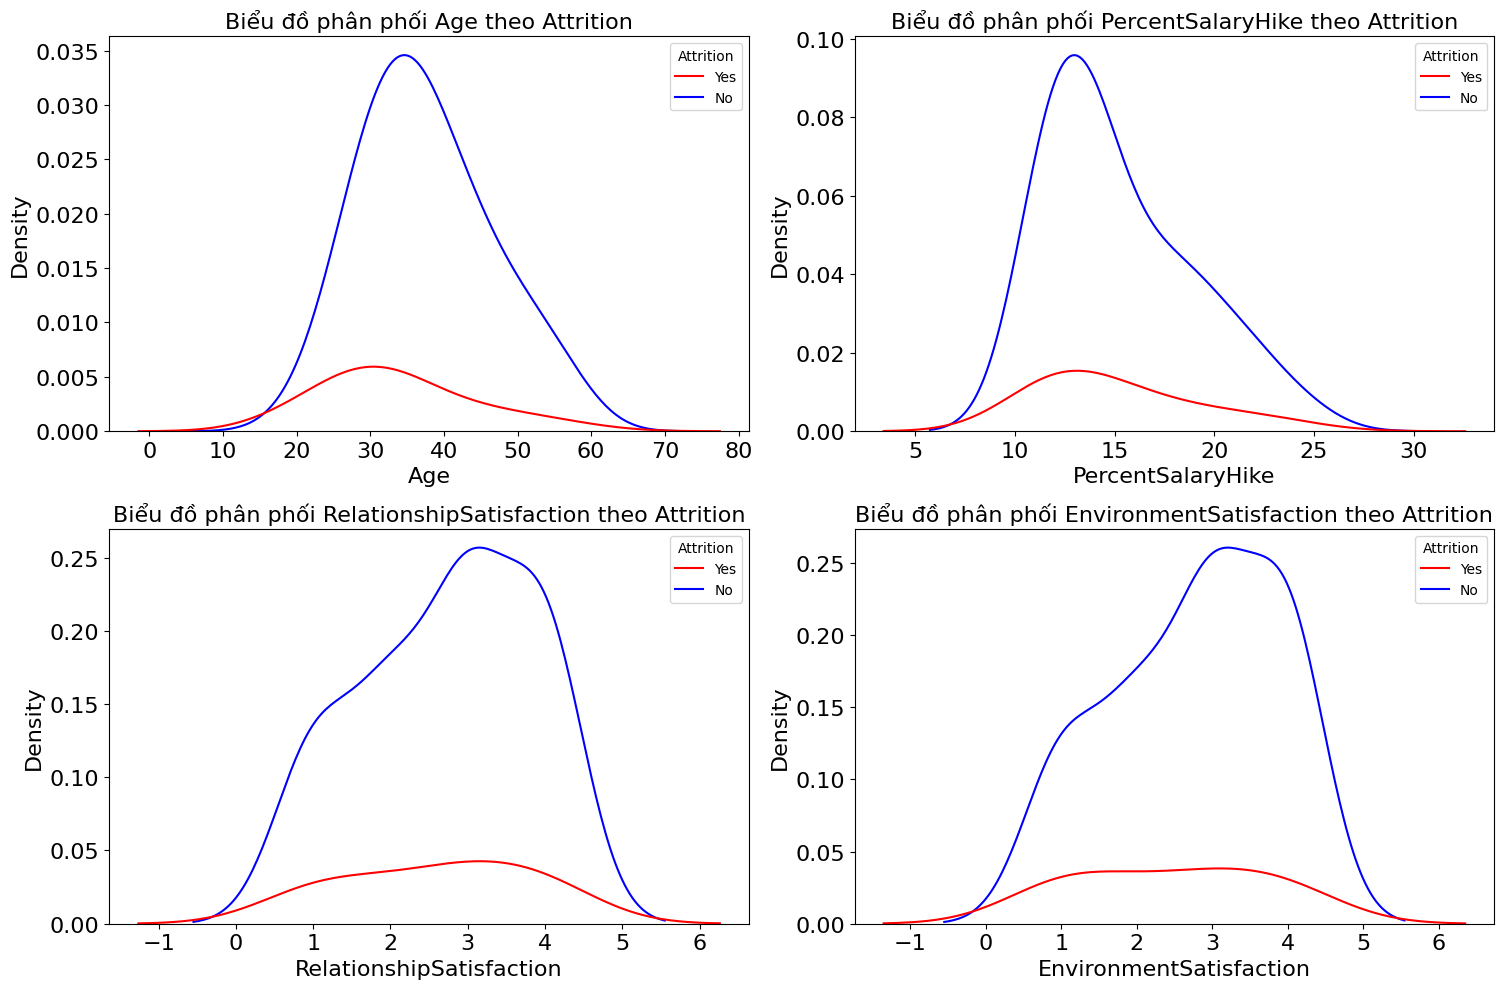

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

variables = ['Age', 'PercentSalaryHike', 'RelationshipSatisfaction', 'EnvironmentSatisfaction']

for i, var in enumerate(variables):
    ax = axs[i//2, i%2]
    sbn.kdeplot(df, x=var, hue='Attrition', palette={'Yes': 'red', 'No': 'blue'}, bw_adjust=2, ax=ax)
    ax.set_title(f'Biểu đồ phân phối {var} theo Attrition', fontsize=16)
    ax.set_xlabel(var, fontsize=16)
    ax.set_ylabel('Density', fontsize=16)
    ax.tick_params(axis='both', labelsize=16)

plt.tight_layout()
plt.show()


###Kiểm định sự khác biệt về tuổi giữa nhân viên ở lại và nhân viên rời đi



In [ ]:
#Phân nhóm
df_yes = df[df['Attrition'] == 'Yes']
df_no = df[df['Attrition'] == 'No']

#Chọn mức ý nghĩa
alpha            = .05
confidence_level = 1 - alpha

## So sánh phương sai 2 mẫu dữ liệu
print(f'Var(Yes) = {df_yes.Age.var(ddof = 1):.2f}; Var(No) = {df_no.Age.var(ddof = 1):.2f}')

Var(Yes) = 93.88; Var(No) = 79.00


In [ ]:
## Kiểm định T, 2 mẫu độc lập, khác phương sai
t, p = stats.ttest_ind(df_yes.Age, df_no.Age, equal_var = False, alternative='less')

## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha:.4f} nên bác bỏ H0 ==> Muy[1] < Muy[2]')
else:
    print(f'Trị số p = {p:.4f} >= {alpha:.4f} KHÔNG bác bỏ H0 ==> Muy[1] >= Muy[2]')

Trị số p = 0.0000 < 0.0500 nên bác bỏ H0 ==> Muy[1] < Muy[2]


###Kiểm định sự khác biệt về mức tăng lương giữa nhân viên ở lại và nhân viên rời đi

In [ ]:
#Phân nhóm
df_yes = df[df['Attrition'] == 'Yes']
df_no = df[df['Attrition'] == 'No']

#Chọn mức ý nghĩa
alpha            = .05

## Kiểm định Mann-Whitney U
group1 = df[df['Attrition'] == 'Yes']['PercentSalaryHike']
group2 = df[df['Attrition'] == 'No']['PercentSalaryHike']
statistic, p = stats.mannwhitneyu(group1, group2,alternative='less')
print(f'Trị số p = {p:.4f}')
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha:.4f} nên bác bỏ H0 ==> Muy[1] < Muy[2]')
else:
    print(f'Trị số p = {p:.4f} >= {alpha:.4f} KHÔNG bác bỏ H0 ==> Muy[1] >= Muy[2]')

Trị số p = 0.1784
Trị số p = 0.1784 >= 0.0500 KHÔNG bác bỏ H0 ==> Muy[1] >= Muy[2]


###Kiểm định sự khác biệt về độ hài lòng về mối quan hệ của nhân viên ở lại so với nhân viên rời đi

In [ ]:
#Phân nhóm
df_yes = df[df['Attrition'] == 'Yes']
df_no = df[df['Attrition'] == 'No']

#Chọn mức ý nghĩa
alpha            = .05

## Kiểm định Mann-Whitney U
group1 = df[df['Attrition'] == 'Yes']['RelationshipSatisfaction']
group2 = df[df['Attrition'] == 'No']['RelationshipSatisfaction']
statistic, p = stats.mannwhitneyu(group1, group2,alternative='two-sided')
print(f'Trị số p = {p:.4f}')
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha:.4f} nên bác bỏ H0 ==> Muy[1] <> Muy[2]')
else:
    print(f'Trị số p = {p:.4f} >= {alpha:.4f} KHÔNG bác bỏ H0 ==> Muy[1] = Muy[2]')

Trị số p = 0.1020
Trị số p = 0.1020 >= 0.0500 KHÔNG bác bỏ H0 ==> Muy[1] = Muy[2]


###Kiểm định sự khác biệt về độ hài lòng về môi trường làm việc của nhân viên ở lại và nhân viên rời đi

In [ ]:
#Phân nhóm
df_yes = df[df['Attrition'] == 'Yes']
df_no = df[df['Attrition'] == 'No']

#Chọn mức ý nghĩa
alpha            = .05

## Kiểm định Mann-Whitney U
group1 = df[df['Attrition'] == 'Yes']['EnvironmentSatisfaction']
group2 = df[df['Attrition'] == 'No']['EnvironmentSatisfaction']

statistic, p = stats.mannwhitneyu(group1, group2,alternative='less')
print(f'Trị số p = {p:.4f}')
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha:.4f} nên bác bỏ H0 ==> Muy[1] < Muy[2]')
else:
    print(f'Trị số p = {p:.4f} >= {alpha:.4f} KHÔNG bác bỏ H0 ==> Muy[1] >= Muy[2]')

Trị số p = 0.0001
Trị số p = 0.0001 < 0.0500 nên bác bỏ H0 ==> Muy[1] < Muy[2]
